# La viabilità nei comuni italiani
## Analisi della differenza percentuale tra spesa storica e fabbisogno

Quante volte il numero di buche incontrate su una strada viene utilizzato come indicatore per valutare l'operato di un sindaco? Sicuramente, il mantenimento della città assicurando ai cittadini delle infrastrutture funzionali e funzionanti, strade non dissestate richiede un impegno economico non banale.
Tra le voci di bilancio di un comune italiano rientra quella di viabilità. Questa voce comprende, non solo i costi dell'asfalto per ricoprire le buche sulle strade, bensì anche tutti i costi relativi agli interventi infrastrutturali necessari per migliorare la mobilità urbana.
In questo approfondimento poniamo l'attenzione su un indicatore fornito dai dati OpenCivitas: la differenza percentuale tra spesa storica e fabbisogni standard rispetto ai fabbisogni dei comuni italiani, con riferimento alla spesa ed al fabbisogno relativi alla viabilità. 

La variabile è confrontata con:

* La differenza percentuale tra servizi offerti/storici e servizi standard.
* Spesa viabilità pro-capite.
* Il reddito medio registrato nel comuni.


Lo scopo di questi confronti è verificare la presenza di caratteristiche simili tra comuni appartenenti a diverse fasce di differenza spesa fabbisogni.


In particolare, le fasce vengono definite come segue:

* __Fascia 2__: La differenza percentuale è maggiore di 100, il che descrive che la spesa è almeno due volte i fabbisogni del comune.

* __Fascia 1__: La differenza percentuale è compresa tra 15 e 100, quindi la spesa non più di due volte più grande dei fabbisogni.

* __Fascia 0__: La differenza percentuale è compresa tra -15 e 15, quindi la spesa è di poco più grande o più piccola dei fabbisogni standard, definiamo questa fascia come fascia di *"equilibrio"* tra spesa e fabbisogno.

* __Fascia -1__: La differenza percentuale è compresa tra -15 e -50, quindi i fabbisogni sono tra una e due volte più grande della spesa.

* __Fascia -2__: La differenza percentuale è compresa tra -15 e -100, il che descrive che i fabbisogni sono almeno due volte la spesa del comune.


In generale, quando la voce spesa eccede quella dei fabbisogni, possiamo ipotizzare la presenza di sprechi. Al contrario, quando i fabbisogni eccedono la spesa, sono stati offerti meno servizi ai cittadini?


Prima di scendere nel dettaglio di analisi si elencano alcuni risultati dell'analisi e quella che potrebbe essere una prosecuzione del lavoro.

__Cosa si evince dall'analisi:__

- I comuni che hanno la voce spesa minore del fabbisogno sono localizzati perlopiù nell'area Centro-Sud della penisola.
- I comuni nel Nord Italia registrano, in proporzioni simili, la spesa ed il fabbisogno in equilibri e la spesa maggiore del fabbisogno al massimo del 100%.

- La presenza di un'associazione statistica tra: differenza spesa storica/fabbisogno standard e la regione di appartenenza del comune.

- Differenziando i comuni per regione di appartenenza, si osserva che la percentuale di comuni che registrano spese in eccesso rispetto al fabbisogno e che offrono meno servizi degli standard è inferiore al 20% per tutte le regioni. Ciò potrebbe fare intendere che il restante ammontare di comuni, per ogni regione, spende più del dovuto ed eroga un numero di servizi maggiore rispetto gli standard. Tra il 2010 ed il 2013 la situazione di modifica in modo negativo in quanto la percentuale di comuni che registrano spese in eccesso rispetto al fabbisogno e che offrono più servizi degli standard è aumentata in ogni regione. 

- Per ogni regione, il numero di comuni che riesce ad erogare un quantità di servizi superiori allo standard, quando le spese ed il fabbisogno sono in equilibrio, sono pochi e si riducono tra il 2010 ed il 2013.

- Come, intuitivamente, ci si potrebbe aspettare, la spesa pro-capite risulta essere maggiore per i comuni la cui bilancia tra spesa e fabbisogni è a favore della spesa.

- In generale, nei comuni il cui reddito medio è più basso, la spesa del comune diminuisce e non copre i fabbisogni.

- Per quasi tutte le regioni, la proporzione di abitanti appartenenti ad una determinata fascia di reddito non sembra variare al variare della fascia (differenza spesa fabbisogno).
 

__Possibili ulteriori analisi:__

- Esplorare le caratteristiche stradali e organizzative dei comuni che rilevano equilibrio tra spesa e fabbisogno e servizi superiori allo standard. L'obiettivo sarebbe quello di identidicare dei comuni "modello".

- Studiare l'andamento del reddito rispetto alla differenza servizi offerti/storici e i servizi standard. Infatti, sarebbe bello poter osservare che i servizi offerti dai comuni dove il reddito personale è più basso, sono di più rispetto i servizi standard. 

 



### Indice
1. [Anno 2010](#2010)    
    1. [Differenza percentuale tra spesa storica e fabbisogno standard](#par1.2)   
    2. [Differenza spesa e fabbisogno a confronto con la differenza tra servizi offerti e servizi standard](#par1.3)  
    3. [Spesa pro-capite: distribuzione sulle fasce](#par1.1)      
    4. [Caratteristiche di reddito dei comuni appartenenti a diverse fasce](#par1.4)

2. [Anno 2013 e confronto con 2010](#2013)   
    1. [Differenza percentuale tra spesa storica e fabbisogno standard](#par2.2)
    2. [Differenza spesa e fabbisogno a confronto con la differenza tra servizi offerti e servizi standard](#par2.3)    
    3. [Spesa pro-capite: distribuzione sulle fasce](#par2.1)
    4. [Caratteristiche di reddito dei comuni appartenenti a diverse fasce](#par2.4)



## Anno 2010 <a name="#2010"></a>

In questa sezione tutte le analisi svolte saranno relative all'anno 2010.

In [1]:
# Importare librerie utili all'analisi
import math
import numpy as np
import pandas as pd
#import seaborn as sns
#sns.set(color_codes=True)
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict

* Importare dati per svolgere l'analisi:
    - __Dataset 1__: `Open Civitas` fabbisogni comuni 2010.
    - __Dataset 2__: `Anagrafica dei comuni`, 2010.

In [2]:
# Importare dataset 1 e selezionare i dati relativi al 2010
df_integrato = pd.read_csv('opencivitas-spesa-storica+dati-irpef.csv', sep = ',')
df_integrato_2010 = df_integrato[df_integrato['ANNO']==2010]

# Importare dataset 2 
df_2010 = pd.read_csv('FC04A_funz_viabilita2010.csv', sep = ',')[['Anno', 'Codice_Nazionale', 'Codice_Istat',
       'Denominazione Italiana', 'Provincia', 'Sigla Provincia',
       'Codice_Provincia', 'Regione', 'Sigla Regione', 'Codice_Regione',
       'AreaGeo', 'CAT_DET_COD_1', 'CAT_DET_COD_2', 'CAT_DET_COD_3',
       'CAT_DET_COD_4', 'CAT_DET_COD_5', 'CAT_DET_COD_6', 'CAT_DET_COD_7',
       'COEFF_TEORICO', 'IND1', 'IND3', 'IND4', 'IND5', 'IND6', 'IND7', 'IND8',
       'IND9', 'IND10', 'LQP_COD_1', 'LQP_COD_2', 'LQP_COD_3', 'LQP_COD_4',
       'LQP_COD_5', 'LQP_COD_6', 'LQP_COD_S']]

* Otteniamo una vista sul Dataset 1

In [3]:
df_integrato_2010.head(3)

,ANNO,COMUNE_CAT_COD,SPESA_CCC_FC01A,TOT_SPESA_CCC_FC01A,SPESA_CCC_FC01B,TOT_SPESA_CCC_FC01B,SPESA_CCC_FC01C,TOT_SPESA_CCC_FC01C,SPESA_CCC_FC01D,TOT_SPESA_CCC_FC01D,...,Reddito imponibile addizionale - Frequenza,Reddito imponibile addizionale IRPEF - Ammontare,Reddito imponibile addizionale IRPEF - Frequenza,Reddito spettanza imprenditore ordinaria (compresi nulli) - Ammontare,Reddito spettanza imprenditore ordinaria (compresi nulli) - Frequenza,Reddito spettanza imprenditore semplificata (compresi nulli) - Ammontare,Reddito spettanza imprenditore semplificata (compresi nulli) - Frequenza,Regione,Sigla Provincia_y,tot_abitanti_tasse
0,2010,A001,128832.900000,4.971702e+08,706678.700000,1.024500e+09,210454.3,551023543.0,2160820.2,6.386494e+09,...,NaN,288473057.0,11377.0,NaN,NaN,NaN,NaN,VENETO,PD,14102.0
1,2010,A004,48.290741,4.971702e+08,3022.240741,1.024500e+09,54.6,551023543.0,110355.7,6.386494e+09,...,NaN,3396780.0,170.0,NaN,NaN,NaN,NaN,LOMBARDIA,LO,207.0
2,2010,A005,50458.800000,4.971702e+08,143147.200000,1.024500e+09,59466.4,551023543.0,359500.4,6.386494e+09,...,NaN,49890297.0,2035.0,NaN,NaN,NaN,NaN,LOMBARDIA,LC,2438.0


* Otteniamo una vista sul Dataset 2

In [4]:
df_2010.head(3)

,Anno,Codice_Nazionale,Codice_Istat,Denominazione Italiana,Provincia,Sigla Provincia,Codice_Provincia,Regione,Sigla Regione,Codice_Regione,...,IND8,IND9,IND10,LQP_COD_1,LQP_COD_2,LQP_COD_3,LQP_COD_4,LQP_COD_5,LQP_COD_6,LQP_COD_S
0,2010,A052,6001.0,Acqui Terme,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.589474,30.0,3.260023,39.823718,-24.516654,0.0,0.0,8.0,3.0,3.0
1,2010,A146,6002.0,Albera Ligure,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,0.0,6.191950,86.235965,-19.242343,0.0,0.0,10.0,4.0,2.8
2,2010,A182,6003.0,Alessandria,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,5.0,6.538632,-73.740234,-27.195587,0.0,1.0,1.0,3.0,5.8


* Quindi uniamo le informazioni contenute nei due dataset utilizzando come elemento comune il `Codice nazionale` di ogni comune, e mostriamo una vista del dataset ottenuto.

In [5]:
df = pd.merge(df_2010,  df_integrato_2010, right_on = 'COMUNE_CAT_COD', left_on = 'Codice_Nazionale', how = 'left')

df.head(3)

,Anno,Codice_Nazionale,Codice_Istat,Denominazione Italiana_x,Provincia,Sigla Provincia,Codice_Provincia,Regione_x,Sigla Regione,Codice_Regione,...,Reddito imponibile addizionale - Frequenza,Reddito imponibile addizionale IRPEF - Ammontare,Reddito imponibile addizionale IRPEF - Frequenza,Reddito spettanza imprenditore ordinaria (compresi nulli) - Ammontare,Reddito spettanza imprenditore ordinaria (compresi nulli) - Frequenza,Reddito spettanza imprenditore semplificata (compresi nulli) - Ammontare,Reddito spettanza imprenditore semplificata (compresi nulli) - Frequenza,Regione_y,Sigla Provincia_y,tot_abitanti_tasse
0,2010,A052,6001.0,Acqui Terme,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,NaN,2.671122e+08,11792.0,NaN,NaN,NaN,NaN,PIEMONTE,AL,15071.0
1,2010,A146,6002.0,Albera Ligure,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,NaN,3.641624e+06,200.0,NaN,NaN,NaN,NaN,PIEMONTE,AL,267.0
2,2010,A182,6003.0,Alessandria,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,NaN,1.313600e+09,55344.0,NaN,NaN,NaN,NaN,PIEMONTE,AL,68749.0


* Effettuiamo un controllo sul numero di comuni che non sono in entrambi i dataset e di cui, necessariamente abbiamo perso le informazioni unendo i due dataset.

In [6]:
print ("Nel passaggio precedente abbiamo perso le informazioni relative a ", sum(df['Regione_y'].isnull()==True)/len(df['Codice_Nazionale'].unique())*100 , "% dei comuni. Vista la bassa percentuale proseguiamo l'analisi.")

Nel passaggio precedente abbiamo perso le informazioni relative a  0.134288272158 % dei comuni. Vista la bassa percentuale proseguiamo l'analisi.


### 1.1. Differenza percentuale tra spesa storica e fabbisogno standard  <a name='par1.2'></a>

Proseguiamo quindi ponendo la nostra attenzione su la differenza percentuale tra la spesa storica ed il fabbisogno standard dei comuni italiani. In particolare, ad ogni comune mettiamo una label che specifica a quale fascia il comune appartiene.

Le fasce sono state definite tenenendo in considerazione le distribuzioni della differenza percentuale dei comuni di ogni regione. Per ognuna, infatti, si osserva che non considerando le code delle distribuzioni (outliers > 100%) i valori della differenza percentuale sono più o meno simmetrici rispetto al valore centrale.

In [7]:
# Definiamo la funzione che creerà le labels per i comuni
def fasce(x):
    if  200>x >= 100 :
        return ("fascia_2")
    elif 15<x<100:
        return ("fascia_1")
    elif -15<=x<=15:
        return ("fascia_0")
    elif -50<x<-15:
        return ("fascia_meno_1")
    elif -100<=x<=-50:
        return ("fascia_meno_2")
    
    
# Quindi creiamo le labels
df['fasce'] = df.LQP_COD_1.apply(fasce)

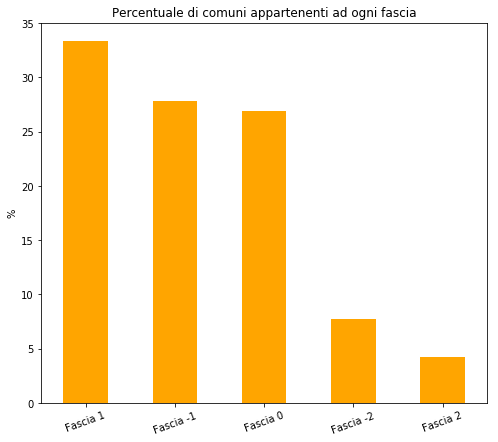

In [8]:
df_20100 = df['fasce'].value_counts()/sum(df['fasce'].value_counts())*100


fig = plt.figure(figsize=(8,7))
df_20100.plot(kind='bar',color='orange')
plt.title('Percentuale di comuni appartenenti ad ogni fascia')
plt.ylabel('%')
plt.xticks([0,1,2,3,4],['Fascia 1','Fascia -1', 'Fascia 0','Fascia -2','Fascia 2'],rotation=20)
plt.savefig('img/fasce_2010.pdf')

Il ~37% dei comuni italiani registra un'eccedenza della spesa rispetto al fabbisogno, di questi comuni il ~12% vede un'eccedenza maggiore di due volte i fabbisogni.
Nel complesso, meno della metà (~27%) dei comuni ha un'eccezenza di spesa/fabbisogno che può essere ritenuta trascurabile.
Il resto dei comuni non ha effettuato spese di viabilità che rispondono ai fabbisogni standard.

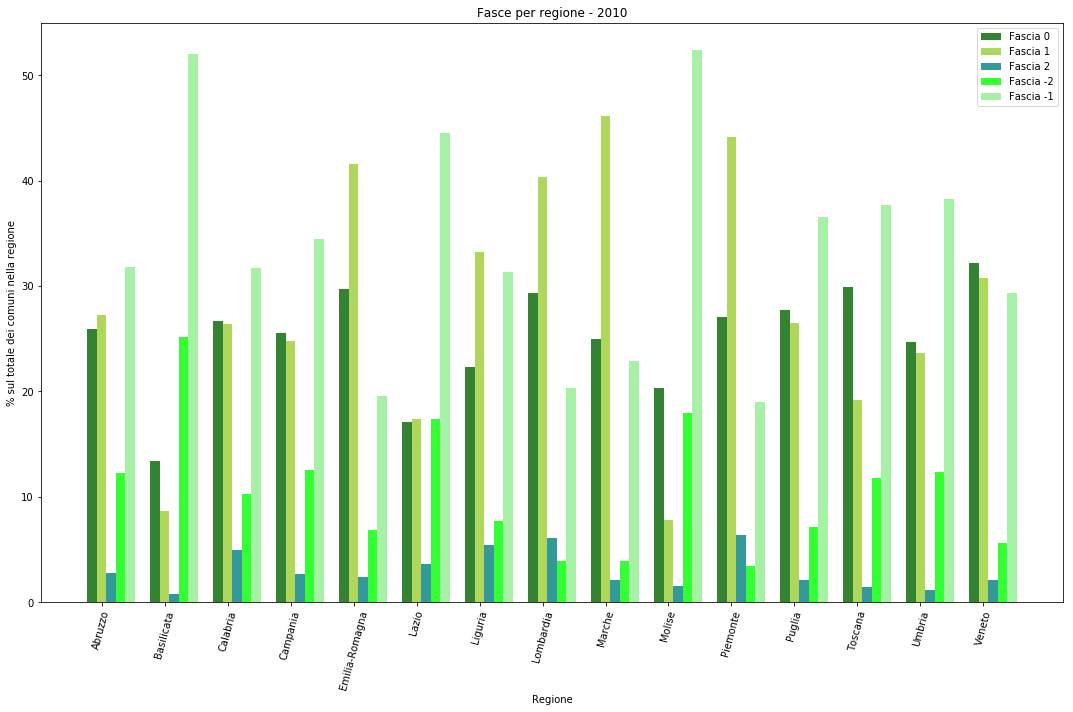

In [9]:
# Creare il grafico
voter_tab = pd.crosstab(df['fasce'], df['Regione_x'], margins = True).iloc[:,:15]
voter_tab = voter_tab/voter_tab.loc['All']*100

n_groups = 15
fascia_0 = voter_tab.loc['fascia_0']
fascia_1 = voter_tab.loc['fascia_1']#[i for i,j in list_fasce['fascia_1']]
fascia_2 = voter_tab.loc['fascia_2']#[i for i,j in list_fasce['fascia_2']]
fascia_meno_1 = voter_tab.loc['fascia_meno_1']
fascia_meno_2 = voter_tab.loc['fascia_meno_2']#[i for i,j in list_fasce['fascia_meno_2']]
 
# create plot
plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,10))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, fascia_0, bar_width,
                 alpha=opacity,
                 color='darkgreen',
                 label='Fascia 0')
 
rects2 = plt.bar(index + bar_width, fascia_1, bar_width,
                 alpha=opacity,
                 color='yellowgreen',
                 label='Fascia 1')

rects2 = plt.bar(index + 2*(bar_width), fascia_2, bar_width,
                 alpha=opacity,
                 color='teal',
                 label='Fascia 2')

rects2 = plt.bar(index + 3*(bar_width), fascia_meno_2, bar_width,
                 alpha=opacity,
                 color='lime',
                 label='Fascia -2')

rects2 = plt.bar(index + 4*(bar_width), fascia_meno_1, bar_width,
                 alpha=opacity,
                 color='lightgreen',
                 label='Fascia -1')
 

 
plt.xlabel('Regione')
plt.ylabel('% sul totale dei comuni nella regione')
plt.title('Fasce per regione - 2010')
plt.xticks(index + bar_width, voter_tab.columns, rotation =75)
plt.legend()
 
plt.tight_layout()
fig.savefig('img/fasce_regioni_2010.pdf')
plt.show()
plt.close()

Si osserva che per le regioni collocate nell'area Centro/Sud della penisola:
* Abruzzo, Lazio, Toscana ed Umbria (Centro)
* Basilicata, Calabria, Molise e Puglia (Sud)

La fascia che contiene il maggior numero di comuni è la Fascia -1, che quindi segnala una presenza preponderante di comuni che spendono meno di quanto sia necessario per rispondere ai fabbisogni standard del comune a tema viabilità. In particolare poniamo l'accento sulla posizione della Basilicata che vede ~75% (tra fascia -1 e fascia -2) dei comuni in questa situazione. Lo stesso avviene per il molise la cui percentuale è un po' più bassa (~65%).

Al contrario, per le regioni situate nell'area settentrionale della penisola, le fasce più consistenti sono quelle che includono i comuni con la differenza spesa-fabbisogno in equilibrio e con la spesa superiore al fabbisogno.

Pertanto, già in questa prima fase di analisi sembra che vi siano delle differenze tra spese e fabbisogni a seconda che i comuni appartengano a regioni del Sude, Nord o Centro Italia. 


La presenza di queste caratteristiche tra Nord e resto dell'Italia è confermata dal fatto che le due variabili categoriche (`Regioni`, `Fasce`) risultano avere un'associazione statistica. Infatti, il test Chi-quadro per l'indipendenza statistica delle variabili, afferma che le due non lo sono. A seguire è riportato il test:

$H_0$: Variabile  `Regione` and variabile `Fasce` sono indipendenti.

$H_a$:  Variabile  `Regione` and variabile `Fasce` sono indipendenti

L'ipotesi alternativa è che sapere il livello della variabile `Regione` può aiutare a predire il livelli della variabile `Fasce`. 

In ogni caso, è __importante__ notare che se l'ipotesi nulla viene rifiutata, il test suggerisce solo la presenza di relazione statistica tra le variabili, che non deve necessariamente essere causale.

In [10]:
# Definizione della tabella delle contingenze
voter_tab = pd.crosstab(df['fasce'], df['Regione_x'], margins = True)
observed = voter_tab.iloc[0:5,0:55]


# Tabella dei valori attesi
expected =  np.outer(voter_tab["All"][0:5],
                     voter_tab.loc["All"][0:15]) / 5221

expected = pd.DataFrame(expected)

expected.columns = voter_tab.columns[0:15]
expected.index = ['fascia_0', 'fascia_1', 'fascia_2', 'fascia_meno_1', 'fascia_meno_2']


# Definire il valore della statistica test
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print("Il valore della statistica test è: ", chi_squared_stat)


crit = stats.chi2.ppf(q = 0.95, # Trovare il valore critico per 1-alpha(=.95) livello di confidenza*
                      df = 56)  #Il numero di gradi di liberta è pari  al numero livelli var 1 -1 moltiplicato
                                # numero livalli var 2 - 1 *

print("Valore critico: ", crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=56)
print("P value: ", p_value)

Il valore della statistica test è:  840.1546680993615
Valore critico:  74.4683241593
P value:  0.0


Conseguentemente, essendo il *p-value* uguale a 0 l'ipotesi di indipendenza tra le variabili (nulla) è rifiutata.

### 1.2. Differenza spesa e fabbisogno a confronto con la differenza tra servizi storici e servizi standard <a name='par1.3'></a>

A questo punto, avendo notato che in delle regioni (soprattutto quelle settentrionali) la spesa per la viabilità, in ~50% dei comuni, eccede i fabbisogno, cerchiamo di capire se ad una spesa più elevata del bisogno corrisponde una maggiore offerta di servizi, rispetto agli standard.


Nella fattispecie, per ogni regione calcoliamo il la percentuale di comuni che registrano avere una spesa superiore al fabbisogno e che, però, offrono servizi inferiore agli standard.

Essendo la nuova variabile continua, anche in questo caso decidiamo di dividere la differenza in fasce.

In [11]:
# Quindi creiamo le labels
df['scaglioni_servizi'] = df.LQP_COD_2.apply(fasce)

Diamo un'occhiata a come i comuni si distribuiscono sulle fasce create. 

In [12]:
df['scaglioni_servizi'].value_counts()/sum(df['scaglioni_servizi'].value_counts())*100

fascia_meno_1    41.993769
fascia_0         25.638629
fascia_1         22.227414
fascia_meno_2     6.230530
fascia_2          3.909657
Name: scaglioni_servizi, dtype: float64

La maggior parte dei comuni mostrano che i servizi storici/offerti sono inferiori ai servizi standard. 

In generale, non siamo contenti se osserviamo l'esistenza di comuni la cui spesa è superiore al fabbisogno ma i servizi offerti sono al di sotto degli standard. Infatti, questo protebbe essere un indicatore di "spreco", poichè sembrerebbe che la spesa elevata non necessariamente corrisponde ad un ottimo livello di servizi rispetto lo standard. Quindi poniamo l'attenzione su questa classe di comuni.

In [13]:
def non_buono(x):
    #print (x)
    #print ('+'*20)
    if (200>x['LQP_COD_1']>15)  and (-100<x['LQP_COD_2']<-15):
        return 'NON BUONO'
    else:
        return 'ALTRO'

* Creiamo quindi la nuova variabile

In [14]:
# Creare la nuova variabile
df['etichetta_non_buono'] = df.apply(non_buono, axis=1)

* Cerchiamo di capire dove sono collocati, in termini di regioni, questi comuni e rispetto al totale dei comuni della regione quale percentuale rappresentano. <a name='confronto.3_10'></a>

In [15]:
pre_pro = pd.crosstab(df['etichetta_non_buono'], df['Regione_x'], margins = True).iloc[:,:15]

to_plot = (pre_pro/pre_pro.loc['All']*100).loc['NON BUONO']
to_plot_neg_10 = to_plot

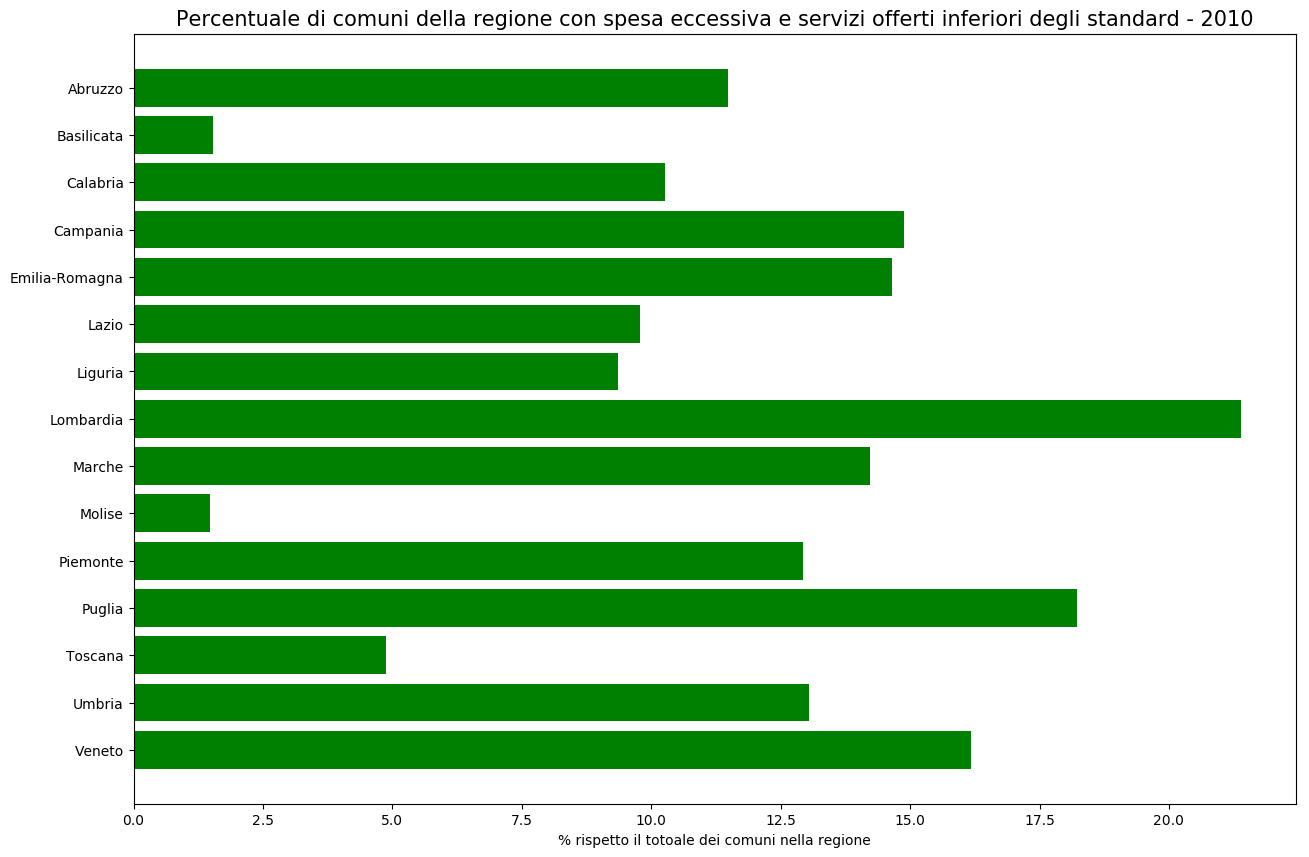

In [16]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15,10))

# Example data
regioni = list(to_plot.index)
y_pos = np.arange(len(regioni))
performance = to_plot

ax.barh(y_pos, performance, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(regioni)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('% rispetto il totoale dei comuni nella regione')
ax.set_title('Percentuale di comuni della regione con spesa eccessiva e servizi offerti inferiori degli standard - 2010', fontsize =15)

fig.savefig('img/spesa_servizio_neg_2010.pdf')
plt.show()
plt.close()

Nelle regioni con alta percentuale di comuni con spesa in eccesso rispetto al fabbisogno standard, come Lombardia ed Emilia-Romagna,  tra il 12% ed il 22% dei comuni offre servizi inferiori agli standard. 

In questi casi, l'eccesso di spesa non è spiegato dai servizi che il comune offre. Pertanto le spese in più potrebbero quasi considerarsi come "non spiegate".

In generale, nonostante i comuni con spesa superiore al fabbisogno siano di meno al Centro ed al Sud, vediamo che in alcune regioni più di ~7% dei comuni non offere servizi extra rispetto agli standard.


D'altro canto, è interessante identificare le regioni, i cui comuni pur mostrando un equilibrio tra spesa e fabbisogno sono capaci di fornire più servizi rispetto gli standard. Ottenere questa informazione potrebbe essere molto interessante in quanto, identificando le strategie usate da questi comuni si potrebbe procedere alla definizione di "modelli" da seguire.

Quindi, mostriamo per ogni regione la percentuale di comuni che registra "equilibrio" tra spesa e fabbisogni e che offre più servizi rispetto agli standard.

In [17]:
def molto_buono(x):
    #print (x)
    #print ('+'*20)
    if  (x['LQP_COD_1']<15) & (x['LQP_COD_1']>-15)  & (x['IND4']<150) &(x['IND4']>0):
        return 'molto BUONO'
    else:
        return 'ALTRO'

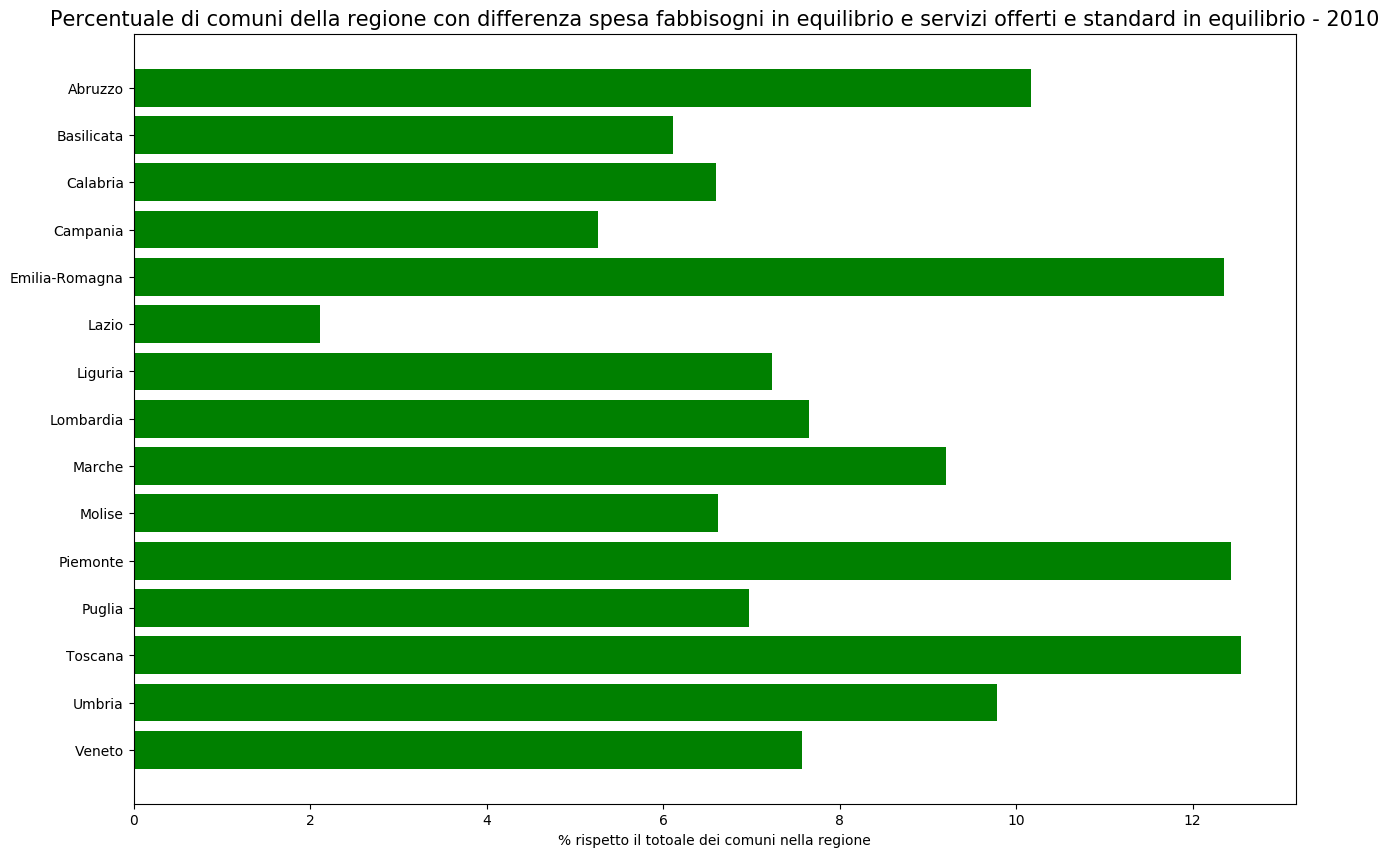

In [18]:
# Creare la nuova variabile
df['etichetta_nolto_buono'] = df.apply(molto_buono, axis=1)

pre_pro = pd.crosstab(df['etichetta_nolto_buono'], df['Regione_x'], margins = True).iloc[:,:15]

to_plot = (pre_pro/pre_pro.loc['All']*100).loc['molto BUONO']
to_plot_pos_10 = to_plot


plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15,10))

# Example data
regioni = list(to_plot.index)
y_pos = np.arange(len(regioni))
performance = to_plot

ax.barh(y_pos, performance, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(regioni)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('% rispetto il totoale dei comuni nella regione')
ax.set_title('Percentuale di comuni della regione con differenza spesa fabbisogni in equilibrio e servizi offerti e standard in equilibrio - 2010', fontsize =15)
fig.savefig('img/spesa_servizi_pos_2010.pdf')

plt.show()
plt.close()

In Abruzzo, Emilia-Romagna, Piemonte e Toscana più del 10% dei comuni si trova nella situazione precedentemente descritta.

Il Lazio risulta essere la regione con la più bassa percentuale di comuni (~2%). In generale, le percentuali più basse si osservano per le regioni del Sud. Difatti, essendo le regioni in cui per la gran parte dei casi i comuni spendono meno del fabbisogno, era difficile immaginare che molti comuni riuscirrero ad erogare più servizi dello standard non eccedendo nelle spese.

Sull'onda di questa analisi, con l'intendo di fornire i "modelli" di comune, prima nominati, sarebbe interessante esplorare le caratteristiche stradali e organizzative di questi comuni che spendendo poco e rispondendo ai fabbisogni standard offrono servizi superiori allo standard.

### 1.3. Spesa pro-capite: distribuzione sulle fasce    <a name="par1.1"></a>

Immaginando che la spesa pro-capite sia inferiore per la fasce con fabbisogno superiore alla spesa, vediamo se ciò è riportato dei numeri che abbiamo.

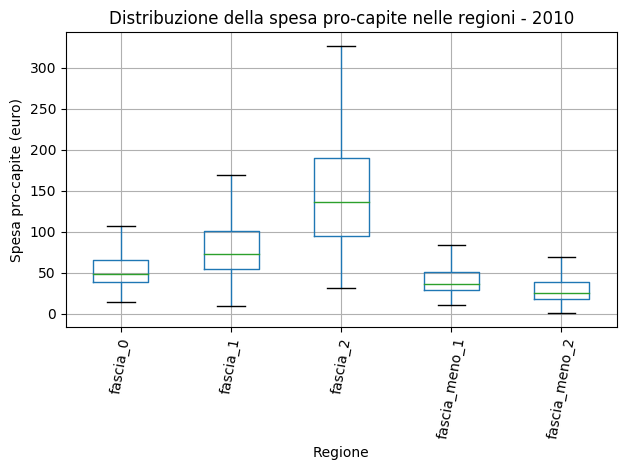

In [19]:
df.boxplot(column=['IND1'], by=['fasce'],showfliers=False )
plt.title('Distribuzione della spesa pro-capite nelle regioni - 2010')
plt.xlabel('Regione')
plt.suptitle('')
plt.ylabel('Spesa pro-capite (euro)')
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig('img/procapite_fasce_2010.pdf')

Effettivamente vediamo che quanto immaginato può essere osservato nel grafico. Infatti, il 50% dei comuni che si trovano in fascia 2, registra un reddito pro-capite di ~140 euro. In più, si osserva che la spesa pro-capite nelle fasce 1 e 2 ha una più alta variabilità delle altre fasce. Questo ci fa immaginare che di fronte ad un grande eccesso della spesa rispetto al fabbisogno, non corrisponde necessariamente un'alta spesa pro-capite.

Per i comuni con livello di spesa e fabbisogno in equilibrio la spesa pro-capite varia tra i 10 e poco più di 100 euro.


Se studiamo come la spesa pro-capite varia nelle varie regioni, si osserva che le regioni il cui 50% dei comuni registra la spesa pro-capite più alta, ~70/75 euro, sono il Piemonte e la Liguria. Allo stesso tempo, vediamo che, per entrambe le regioni, la forbice di spesa pro-capite è la più ampia. 

La regione il cui 50% dei comuni osserva la minore spesa pro-capite, 30 euro, è invece la Puglia. Seguita da Basilicata, Calabria, Campania, Toscana e Veneto il cui 50% dei comuni non superano i 50 euro di spesa pro-capite.

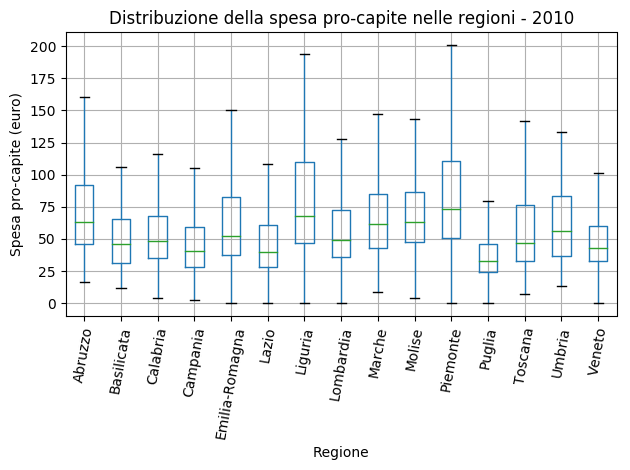

In [20]:
df.boxplot(column=['IND1'], by=['Regione_x'],showfliers=False )
plt.title('Distribuzione della spesa pro-capite nelle regioni - 2010')
plt.xlabel('Regione')
plt.suptitle('')
plt.ylabel('Spesa pro-capite (euro)')
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig('img/procapite_regioni_2010.pdf')

### 1.4. Caratteristiche di reddito dei comuni appartenenti a diverse fasce <a name='par1.4'></a>

Interessante è osservare le caratteristiche di reddito dei comuni appartenenti a diverse fasce. Pertanto, cerchiamo di capire la distribuzione del reddito rispetto alle fasce.

Il reddito annuale medio dei comuni in "equilibrio" è circa 17'500 euro. Nelle fasce relative ad una spesa inferiore del fabbisogno il reddito descresce fino a 15'000 euro.

Invece, per le fasce con spesa superiore ai fabbisogni il reddito medio diminuisce ma in modo meno netto. Non scendendo al di sotto dei 16'500 euro.

In [21]:
df__2010 = df

df__2010['Reddito totale frequenze'] = df__2010['Reddito complessivo da 0 a 10000 euro - Frequenza'].fillna(0) + df__2010['Reddito complessivo da 10000 a 15000 euro - Frequenza'].fillna(0) + df__2010['Reddito complessivo da 15000 a 26000 euro - Frequenza'].fillna(0) + df__2010['Reddito complessivo da 26000 a 55000 euro - Frequenza'].fillna(0) + df__2010['Reddito complessivo da 55000 a 75000 euro - Frequenza'].fillna(0) + df__2010['Reddito complessivo da 75000 a 120000 euro - Frequenza'].fillna(0) + df__2010['Reddito complessivo minore o uguale a zero euro - Frequenza'].fillna(0) + df__2010['Reddito complessivo oltre 120000 euro - Frequenza'].fillna(0) 
df__2010['Reddito totale ammontare'] = df__2010['Reddito complessivo da 0 a 10000 euro - Ammontare'].fillna(0) + df__2010['Reddito complessivo da 10000 a 15000 euro - Ammontare'].fillna(0) + df__2010['Reddito complessivo da 15000 a 26000 euro - Ammontare'].fillna(0) + df__2010['Reddito complessivo da 26000 a 55000 euro - Ammontare'].fillna(0) + df__2010['Reddito complessivo da 55000 a 75000 euro - Ammontare'].fillna(0) + df__2010['Reddito complessivo da 75000 a 120000 euro - Ammontare'].fillna(0) + df__2010['Reddito complessivo minore o uguale a zero euro - Ammontare'].fillna(0) + df__2010['Reddito complessivo oltre 120000 euro - Ammontare'].fillna(0) 

# Definire il reddito per abitante
df__2010['Reddito per abitante'] = df__2010['Reddito totale ammontare']/df__2010['Reddito totale frequenze']

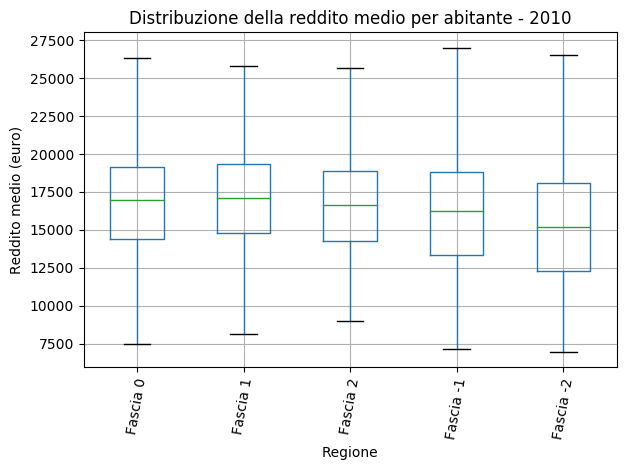

In [22]:
df__2010.boxplot(column=['Reddito per abitante'], by=['fasce'],showfliers=False )
plt.title('Distribuzione della reddito medio per abitante - 2010')
plt.xlabel('Regione')
plt.suptitle('')
plt.ylabel('Reddito medio (euro)')
plt.xticks([1,2,3,4,5],['Fascia 0','Fascia 1','Fascia 2','Fascia -1','Fascia -2'],rotation=80)
plt.tight_layout()
plt.savefig('img/reddito_medio_2010.pdf')

Per future analisi sarebbe interessante studiare l'andamento del reddito sulle fasce ottenute sulla differenza servizi offerti/storici e i servizi standard. Infatti, sarebbe bello vedere che i servizi offerti dai comuni dove il reddito personale è più basso, sono di più rispetto i servizi standard. Questo mostrerebbe il riguardo che i comunu hanno nel servire i propri cittadini.


Per avere un'idea dell'andamento dei redditi sulle aree territoriali italiane, mostriamo per ogni regione e per ogni fascia la percentuale di comuni, sul totale dei comuni nella regione.

In [23]:
# Redditi e tasse
df['Reddito totale frequenze'] = df['Reddito complessivo da 0 a 10000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 10000 a 15000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 15000 a 26000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 26000 a 55000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 55000 a 75000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 75000 a 120000 euro - Frequenza'].fillna(0) + df['Reddito complessivo minore o uguale a zero euro - Frequenza'].fillna(0) + df['Reddito complessivo oltre 120000 euro - Frequenza'].fillna(0) 

# Aggiustare i dati per i plot
fasce = ['fascia_0','fascia_1', 'fascia_2', 'fascia_meno_1', 'fascia_meno_2']

dictionary_fasce = {}
for f in fasce: 
    df_fascia_0 = df[df['fasce'] == f]

    # Ottenere totale frequenze redditi nelle varie regioni
    totale_fascia = df_fascia_0[['Reddito totale frequenze', 'Regione_x']].groupby('Regione_x').sum()['Reddito totale frequenze']

    # Ottenere frequenze sulle diverse fasce di reddito nelle diverse regioni
    redditi_regioni = df_fascia_0[['Reddito complessivo da 0 a 10000 euro - Frequenza', 'Reddito complessivo da 10000 a 15000 euro - Frequenza','Reddito complessivo da 15000 a 26000 euro - Frequenza','Reddito complessivo da 26000 a 55000 euro - Frequenza','Reddito complessivo da 55000 a 75000 euro - Frequenza','Reddito complessivo da 75000 a 120000 euro - Frequenza', 'Reddito complessivo minore o uguale a zero euro - Frequenza', 'Reddito complessivo oltre 120000 euro - Frequenza', 'Regione_x']].groupby('Regione_x').sum()#.describe()

    # Matrice di dati da plottare
    to_plot = redditi_regioni.div(totale_fascia, axis=0)*100
    
    dictionary_fasce[f] = to_plot

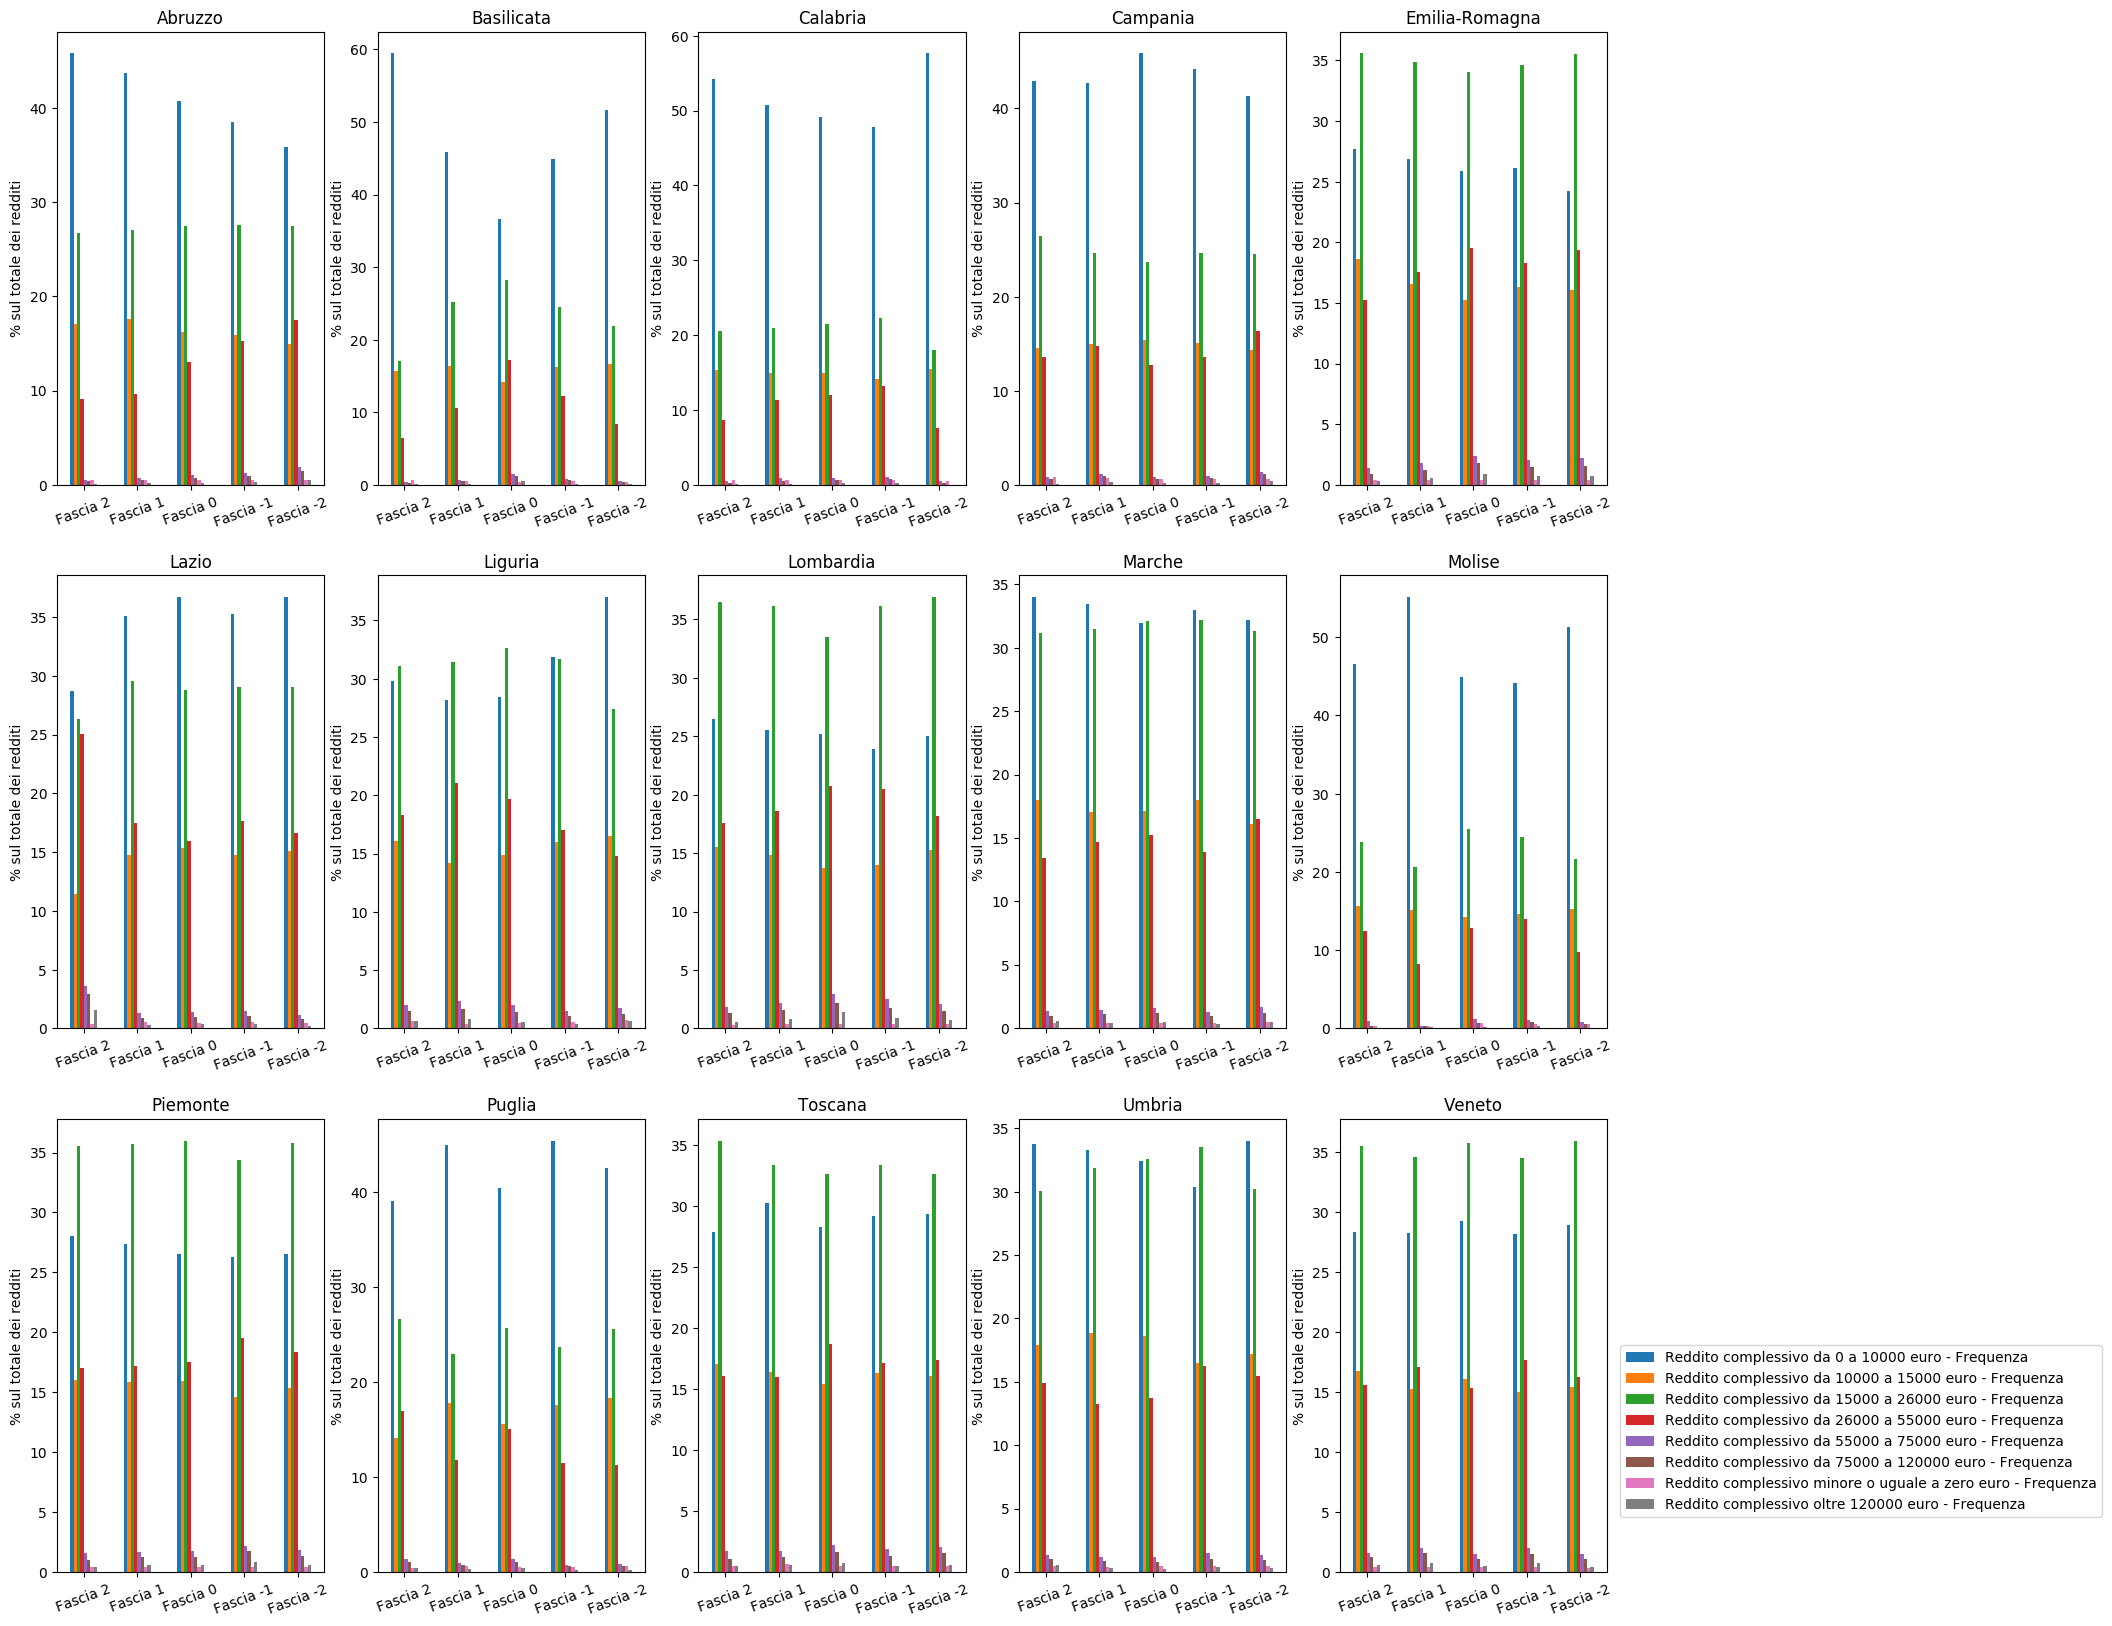

In [24]:
def buckets(i):
    return list(df['LQP_COD_1'].groupby(df['Regione_x']))[i][0]

num_plots = len(df['LQP_COD_1'].groupby(df['Regione_x']).describe())
fig, axes = plt.subplots(3,5,figsize=(20,20))

for i,r in enumerate(regioni):
    fascia_0 = dictionary_fasce['fascia_0'].loc[r]
    fascia_1 = dictionary_fasce['fascia_1'].loc[r]
    fascia_2 = dictionary_fasce['fascia_2'].loc[r]
    fascia_meno_2 = dictionary_fasce['fascia_meno_2'].loc[r]
    fascia_meno_1 = dictionary_fasce['fascia_meno_1'].loc[r]
    
    df_to_plot = pd.DataFrame([fascia_2, fascia_1, fascia_0,fascia_meno_1,fascia_meno_2])
    df_to_plot.index = [ 'Fascia 2', 'Fascia 1','Fascia 0', 'Fascia -1' , 'Fascia -2']
    
    row = i // 5
    col = i % 5
    ax_curr = axes[row, col]
    
    df_to_plot.plot.bar(legend=False, ax=ax_curr)#.legend(bbox_to_anchor=(1.05, 0), loc='best', borderaxespad=0.)
    #ax_curr.tick_params(axis='x', labelrotation=45)
    
    for tick in ax_curr.get_xticklabels():
        tick.set_rotation(20)
    #sns.distplot(np.array(distribuzione_regione), ax=ax_curr)
    ax_curr.set_title(buckets(i))
    ax_curr.set_ylabel('% sul totale dei redditi')
    
#df_to_plot.plot.bar(legend=False, ax=ax_curr).legend(bbox_to_anchor=(1.05, 0.5), loc='best', borderaxespad=0.)
ax_curr.legend(bbox_to_anchor=(1.05, 0.5), loc='best', borderaxespad=0.)
plt.xticks(rotation = 20)
plt.savefig('img/reddito_fasce_2010.pdf', bbox_inches="tight")

Una considerazione generale che può essere fatta è che  le regioni del Centro/Nord, come `Emilia-Romagna`, `Liguria`, `Lombardia`, `Piemonte`, `Toscana` e `Veneto`, la fascia di reddito in cui i cittadini si trovano è quella tra i 15 e 26 mila euro l'anno.


In termini di `differenza spesa storica fabbisogni standard`, si nota che nel complesso la distribuzione dei redditi rispetto alle fasce, rimane la stessa al variare di quest'ultima.

Le  regioni dove si osservano variazioni particolari sono:
* Abruzzo: 
    - Mano a mano che la spesa si riduce, passando dall'eccesso al difetto, rispetto al fabbisogno, la percentuale di popolazione con reddito appartenente alle due fasce (0-10'000 e 10'000-15'000) diminuisce a favore delle classi di reddito superiori (15'000-26'000 e 26'000-55'000).
    
    
* Basilicata:
    - Quando la quantità di spesa diminuisce, fino all'equilibrio tra spesa e fabbisogno, la porzione di popolazione appartenente alla fascia di reddito 0-10'000 si riduce a favore della fascia di reddito 15'000-26'000.
    - Andamento opposto si verifica quando il fabbisogno cresce ed eccede la spesa.


In generale, la composizione delle fasce di reddito nelle varie fasce non mostra cambiamenti significativi. Pertanto, in termini di variabilità reddito medio dei cittadini e differenza tra spesa e fabbisogni non sembrano avere una relazione.

## Anno 2013  e confronto con 2010 <a name="2013"></a>


Con l'obiettivo di confrontare la situazione del 2010 con quella del 2013, ripetiamo la stessa analisi per il nuovo anno (2013).Includendo una parte di confronto con il precedente anno in questione (2010).

* Importare dati per svolgere l'analisi:
    - __Dataset 1__: `Open Civitas` fabbisogni comuni 2013.
    - __Dataset 2__: `Anagrafica dei comuni`, 2013.

In [25]:
# Importare dataset 1 e selezionare i dati relativi al 2010
df_integrato = pd.read_csv('opencivitas-spesa-storica+dati-irpef.csv', sep = ',')
df_integrato_2010 = df_integrato[df_integrato['ANNO']==2013]

# Importare dataset 2 
df_2010 = pd.read_csv('FC04A_funz_viabilita2013.csv', sep = ',')[['Anno', 'Codice_Nazionale', 'Codice_Istat',
       'Denominazione Italiana', 'Provincia', 'Sigla Provincia',
       'Codice_Provincia', 'Regione', 'Sigla Regione', 'Codice_Regione',
       'AreaGeo', 'CAT_DET_COD_1', 'CAT_DET_COD_2', 'CAT_DET_COD_3',
       'CAT_DET_COD_4', 'CAT_DET_COD_5', 'CAT_DET_COD_6', 'CAT_DET_COD_7',
       'COEFF_TEORICO', 'IND1', 'IND3', 'IND4', 'IND5', 'IND6', 'IND7', 'IND8',
       'IND9', 'IND10', 'LQP_COD_1', 'LQP_COD_2', 'LQP_COD_3', 'LQP_COD_4',
       'LQP_COD_5', 'LQP_COD_6', 'LQP_COD_S']]

* Otteniamo una vista sul Dataset 1

In [26]:
df_integrato_2010.head(3)

,ANNO,COMUNE_CAT_COD,SPESA_CCC_FC01A,TOT_SPESA_CCC_FC01A,SPESA_CCC_FC01B,TOT_SPESA_CCC_FC01B,SPESA_CCC_FC01C,TOT_SPESA_CCC_FC01C,SPESA_CCC_FC01D,TOT_SPESA_CCC_FC01D,...,Reddito imponibile addizionale - Frequenza,Reddito imponibile addizionale IRPEF - Ammontare,Reddito imponibile addizionale IRPEF - Frequenza,Reddito spettanza imprenditore ordinaria (compresi nulli) - Ammontare,Reddito spettanza imprenditore ordinaria (compresi nulli) - Frequenza,Reddito spettanza imprenditore semplificata (compresi nulli) - Ammontare,Reddito spettanza imprenditore semplificata (compresi nulli) - Frequenza,Regione,Sigla Provincia_y,tot_abitanti_tasse
20062,2013,A001,108324.895,7.767792e+08,732155.494,1.094984e+09,173542.621,6.197194e+08,1807384.600,5.033531e+09,...,11292.0,NaN,NaN,NaN,NaN,NaN,NaN,Veneto,PD,13989.0
20063,2013,A004,10500.000,7.767792e+08,2800.000,1.094984e+09,70.000,6.197194e+08,76255.305,5.033531e+09,...,166.0,NaN,NaN,NaN,NaN,NaN,NaN,Lombardia,LO,208.0
20064,2013,A005,38620.659,7.767792e+08,79267.132,1.094984e+09,59788.603,6.197194e+08,310894.899,5.033531e+09,...,1993.0,NaN,NaN,NaN,NaN,NaN,NaN,Lombardia,LC,2431.0


* Otteniamo una vista sul Dataset 2

In [27]:
df_2010.head(3)

,Anno,Codice_Nazionale,Codice_Istat,Denominazione Italiana,Provincia,Sigla Provincia,Codice_Provincia,Regione,Sigla Regione,Codice_Regione,...,IND8,IND9,IND10,LQP_COD_1,LQP_COD_2,LQP_COD_3,LQP_COD_4,LQP_COD_5,LQP_COD_6,LQP_COD_S
0,2013,A052,6001,Acqui Terme,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.007859,14.0,2.726687,27.275620,-25.356476,0,0,8.0,4.0,3.6
1,2013,A146,6002,Albera Ligure,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.000000,0.0,0.000000,51.700794,38.777238,0,0,9.0,8.0,5.6
2,2013,A182,6003,Alessandria,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,0.009552,13.0,10.969565,-35.979325,-29.652084,0,0,2.0,4.0,6.0


* Quindi uniamo le informazioni contenute nei due dataset utilizzando come elemento comune il `Codice nazionale` di ogni comune, e mostriamo una vista del dataset ottenuto.

In [28]:
df = pd.merge(df_2010,  df_integrato_2010, right_on = 'COMUNE_CAT_COD', left_on = 'Codice_Nazionale', how = 'left')

df.head(3)

,Anno,Codice_Nazionale,Codice_Istat,Denominazione Italiana_x,Provincia,Sigla Provincia,Codice_Provincia,Regione_x,Sigla Regione,Codice_Regione,...,Reddito imponibile addizionale - Frequenza,Reddito imponibile addizionale IRPEF - Ammontare,Reddito imponibile addizionale IRPEF - Frequenza,Reddito spettanza imprenditore ordinaria (compresi nulli) - Ammontare,Reddito spettanza imprenditore ordinaria (compresi nulli) - Frequenza,Reddito spettanza imprenditore semplificata (compresi nulli) - Ammontare,Reddito spettanza imprenditore semplificata (compresi nulli) - Frequenza,Regione_y,Sigla Provincia_y,tot_abitanti_tasse
0,2013,A052,6001,Acqui Terme,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,11409.0,NaN,NaN,NaN,NaN,NaN,NaN,Piemonte,AL,14509.0
1,2013,A146,6002,Albera Ligure,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,203.0,NaN,NaN,NaN,NaN,NaN,NaN,Piemonte,AL,254.0
2,2013,A182,6003,Alessandria,Alessandria,AL,6.0,Piemonte,PIE,1.0,...,53292.0,NaN,NaN,NaN,NaN,NaN,NaN,Piemonte,AL,66027.0


* Effettuiamo un controllo sul numero di comuni che non sono in entrambi i dataset e di cui, necessariamente abbiamo perso le informazioni unendo i due dataset.

In [29]:
print ("Nel passaggio precedente abbiamo perso le informazioni relative a ", sum(df['Regione_y'].isnull()==True)/len(df['Codice_Nazionale'].unique())*100 , "% dei comuni. Vista la bassa percentuale proseguiamo l'analisi.")

Nel passaggio precedente abbiamo perso le informazioni relative a  0.880728466935 % dei comuni. Vista la bassa percentuale proseguiamo l'analisi.


### 2.1. Differenza percentuale tra spesa storica e fabbisogno standard  <a name='par2.2'></a>

La classifica delle fasce più popolate nel 2013 resta inviariata dispetto al 2010. Ciò che si osserva è un aumento della percentuale di comuni appartenenti alla fascia carattereizzata dall'equilibrio tra spesa e fabbisogni. Questo aumento va a discapito della fascia meno due la cui percentuale è scende al di sotto del 5%. 

Quanto si osserva può ritenersi incoraggiante, in quanto la fascia di equilibrio è quella che si auspica raccogliere più comuni in quanto: da una parte assicura ai cittadini che i fabbisogni siano soddisfatti, da un'altra prospettiva rende più sicura l'assenza di sprechi e spese non utili.

In [32]:
# Definiamo la funzione che creerà le labels per i comuni
def fasce(x):
    if  200>x >= 100 :
        return ("fascia_2")
    elif 15<x<100:
        return ("fascia_1")
    elif -15<=x<=15:
        return ("fascia_0")
    elif -50<x<-15:
        return ("fascia_meno_1")
    elif -100<=x<=-50:
        return ("fascia_meno_2")
# Quindi creiamo le labels
df['fasce'] = df.LQP_COD_1.apply(fasce)

df_2013 = df['fasce'].value_counts()/sum(df['fasce'].value_counts())*100

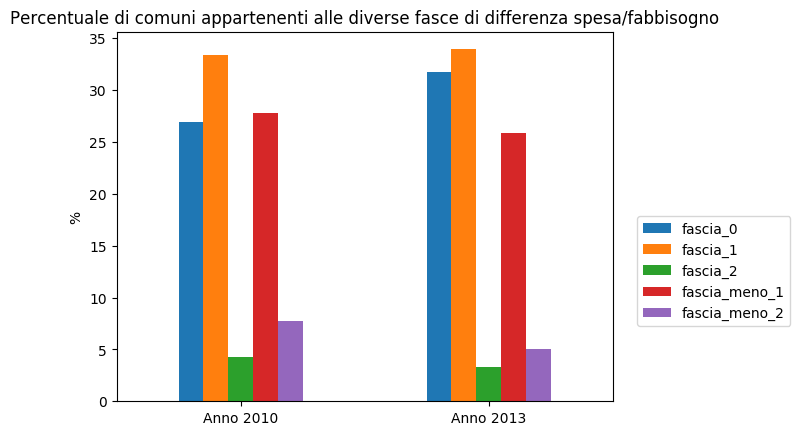

In [33]:
pp = pd.DataFrame([df_20100,df_2013])
pp.index = ['Anno 2010', 'Anno 2013']

pp.plot.bar().legend(bbox_to_anchor=(1.05, 0.5), loc='best', borderaxespad=0.)
plt.xticks(rotation=0)
plt.title('Percentuale di comuni appartenenti alle diverse fasce di differenza spesa/fabbisogno')
plt.ylabel('%')
plt.savefig('img/fasce_1013.pdf',  bbox_inches="tight")

Calabria, Campagnia, Puglia ed Umbria risultano avere, rispetto al 2010 un maggior numero di comuni nella fascia 1. In particolare questo aumento è andato a discapito della fascia di equilibrio. 

In generale, con alcune eccezioni, sembra che la quantità di comuni il cui fabbisono è consistentemente inferiore alla spesa si sia ridotto tra le regioni. Effettivamente questa è la conferma ad una granularità più bassa di quanto osservato allo step precedente.

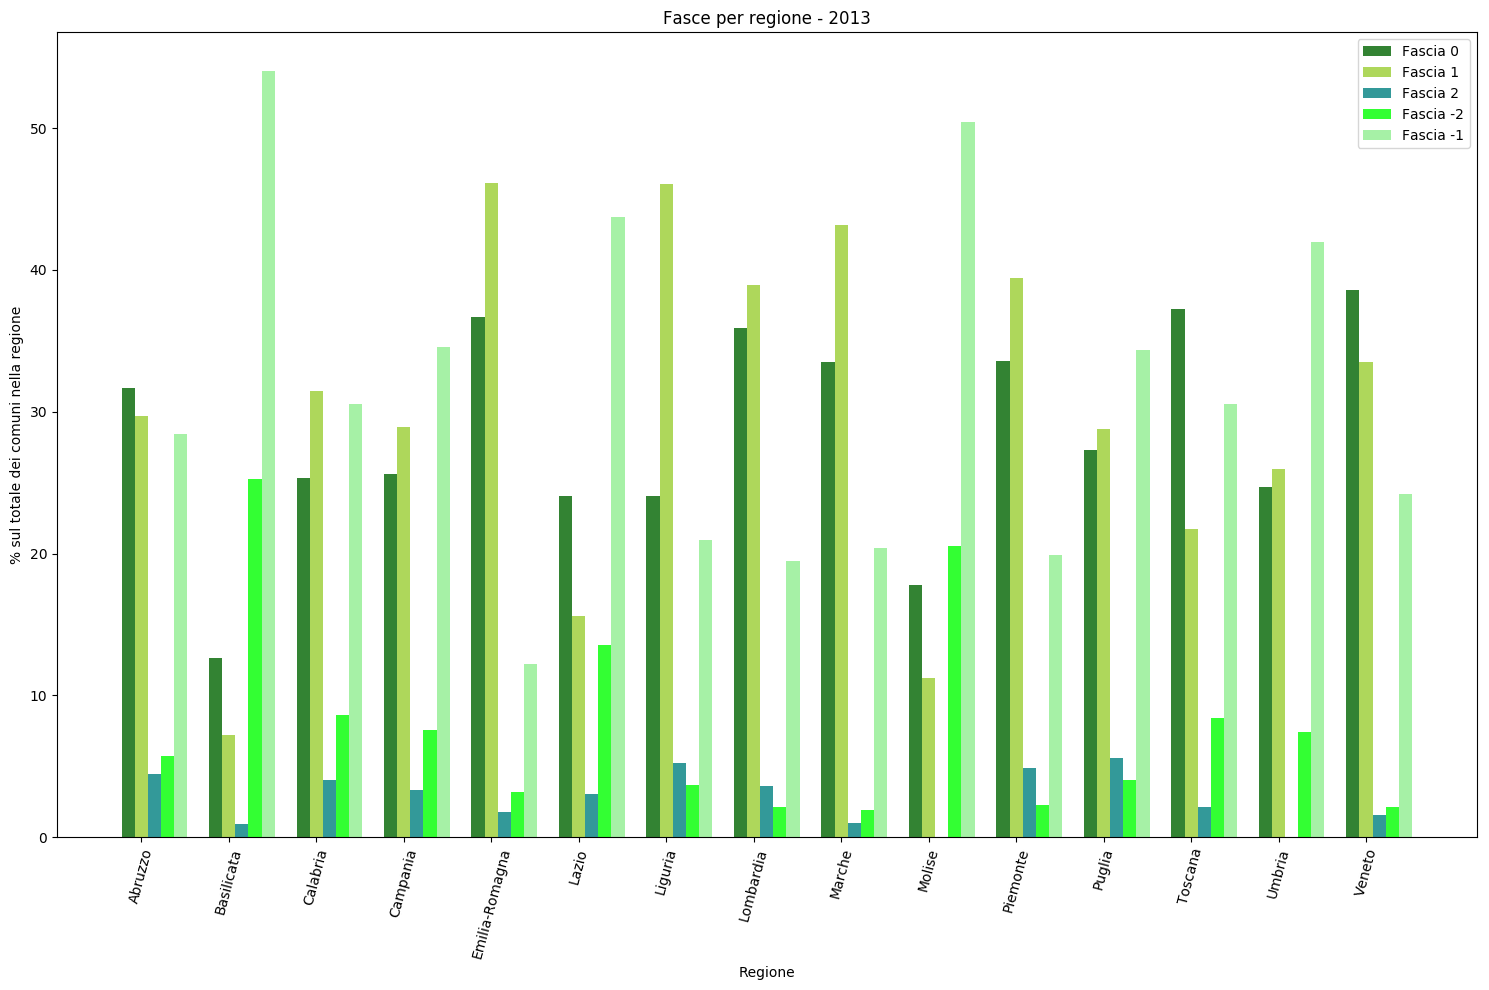

In [34]:
# Creare il grafico
voter_tab = pd.crosstab(df['fasce'], df['Regione_x'], margins = True).iloc[:,:15]
voter_tab = voter_tab/voter_tab.loc['All']*100

n_groups = 15
fascia_0 = voter_tab.loc['fascia_0']
fascia_1 = voter_tab.loc['fascia_1']#[i for i,j in list_fasce['fascia_1']]
fascia_2 = voter_tab.loc['fascia_2']#[i for i,j in list_fasce['fascia_2']]
fascia_meno_1 = voter_tab.loc['fascia_meno_1']
fascia_meno_2 = voter_tab.loc['fascia_meno_2']#[i for i,j in list_fasce['fascia_meno_2']]
 
# create plot
plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,10))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, fascia_0, bar_width,
                 alpha=opacity,
                 color='darkgreen',
                 label='Fascia 0')
 
rects2 = plt.bar(index + bar_width, fascia_1, bar_width,
                 alpha=opacity,
                 color='yellowgreen',
                 label='Fascia 1')

rects2 = plt.bar(index + 2*(bar_width), fascia_2, bar_width,
                 alpha=opacity,
                 color='teal',
                 label='Fascia 2')

rects2 = plt.bar(index + 3*(bar_width), fascia_meno_2, bar_width,
                 alpha=opacity,
                 color='lime',
                 label='Fascia -2')

rects2 = plt.bar(index + 4*(bar_width), fascia_meno_1, bar_width,
                 alpha=opacity,
                 color='lightgreen',
                 label='Fascia -1')
 

 
plt.xlabel('Regione')
plt.ylabel('% sul totale dei comuni nella regione')
plt.title('Fasce per regione - 2013')
plt.xticks(index + bar_width, voter_tab.columns, rotation =75)
plt.legend()
 
plt.tight_layout()
fig.savefig('img/fasce_regioni_2013.pdf')
plt.show()
plt.close()

### 2.2. Differenza spesa e fabbisogno a confronto con la differenza tra servizi storici e servizi standard <a name='par2.3'></a>

In questo senso, ciò che osserviamo confrontando il 2013 con il 2010 è che le percentuali di comuni che effettuano spese superiori al fabbisogno e che offrono servizi inferiori agli standard è aumentato rispetto al 2010. 

In particolar modo in Liguria si osserva l'aumento più consistente, ~10% di comuni in più.

In [35]:
# Creare la nuova variabile
df['etichetta_non_buono'] = df.apply(non_buono, axis=1)

* Cerchiamo di capire dove sono collocati, in termini di regioni, questi comuni e rispetto al totale dei comuni della regione quale percentuale rappresentano. <a name='confronto.3'></a>

In [36]:
pre_pro = pd.crosstab(df['etichetta_non_buono'], df['Regione_x'], margins = True).iloc[:,:15]

to_plot = (pre_pro/pre_pro.loc['All']*100).loc['NON BUONO']

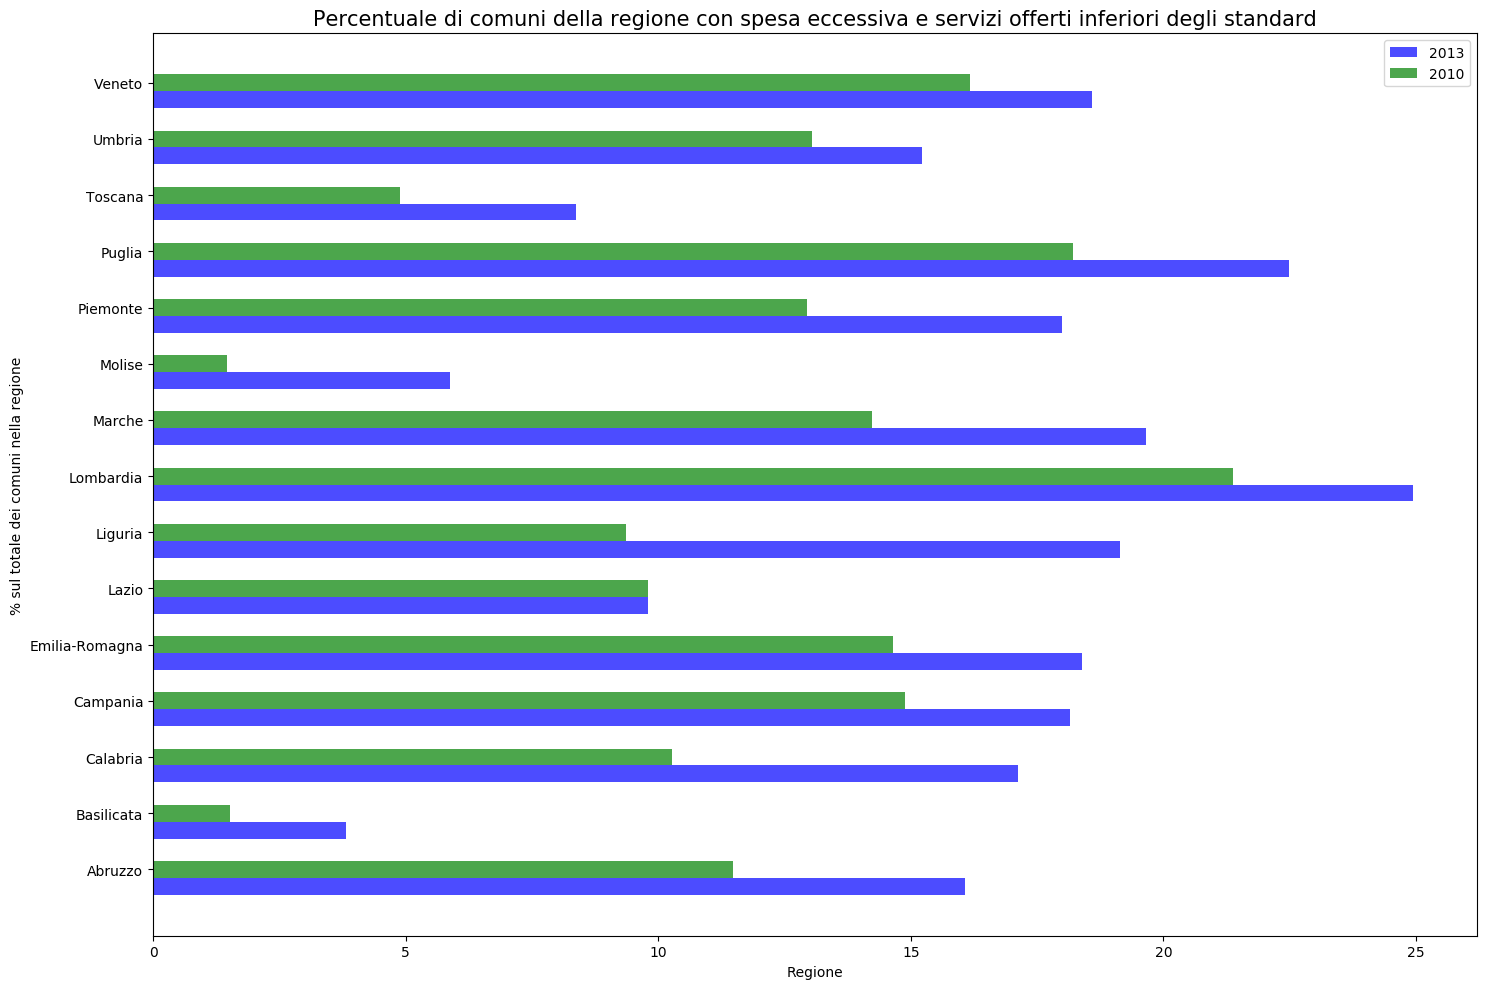

In [38]:
# data to plot
n_groups = 15
means_frank = to_plot#(90, 55, 40, 65)
means_guido = to_plot_neg_10#(85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots(figsize=(15,10))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7
 
rects1 = plt.barh(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='2013')
 
rects2 = plt.barh(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='2010')
 
plt.xlabel('Regione')
plt.ylabel('% sul totale dei comuni nella regione')
plt.title('Percentuale di comuni della regione con spesa eccessiva e servizi offerti inferiori degli standard', fontsize =15)
plt.yticks(index + bar_width, list(to_plot_neg_10.index))
plt.legend()
 
plt.tight_layout()
plt.savefig('img/regione_neg_13.pdf')
plt.show()

Purtroppo, in modo opposto, la percentuale di comuni in equilibrio e che offrono più servizi rispetto gli standard è diminuito in tutte le regioni eccetto che nel Lazio. 

In linea con quanto detto precedentemente, si è ridotto il numero di comuni che potrebbero essere studiati per trovare un modello di comune da seguire (sempre per la viabilità).

In [39]:
# Creare la nuova variabile
df['etichetta_nolto_buono'] = df.apply(molto_buono, axis=1)

pre_pro = pd.crosstab(df['etichetta_nolto_buono'], df['Regione_x'], margins = True).iloc[:,:15]

to_plot = (pre_pro/pre_pro.loc['All']*100).loc['molto BUONO']

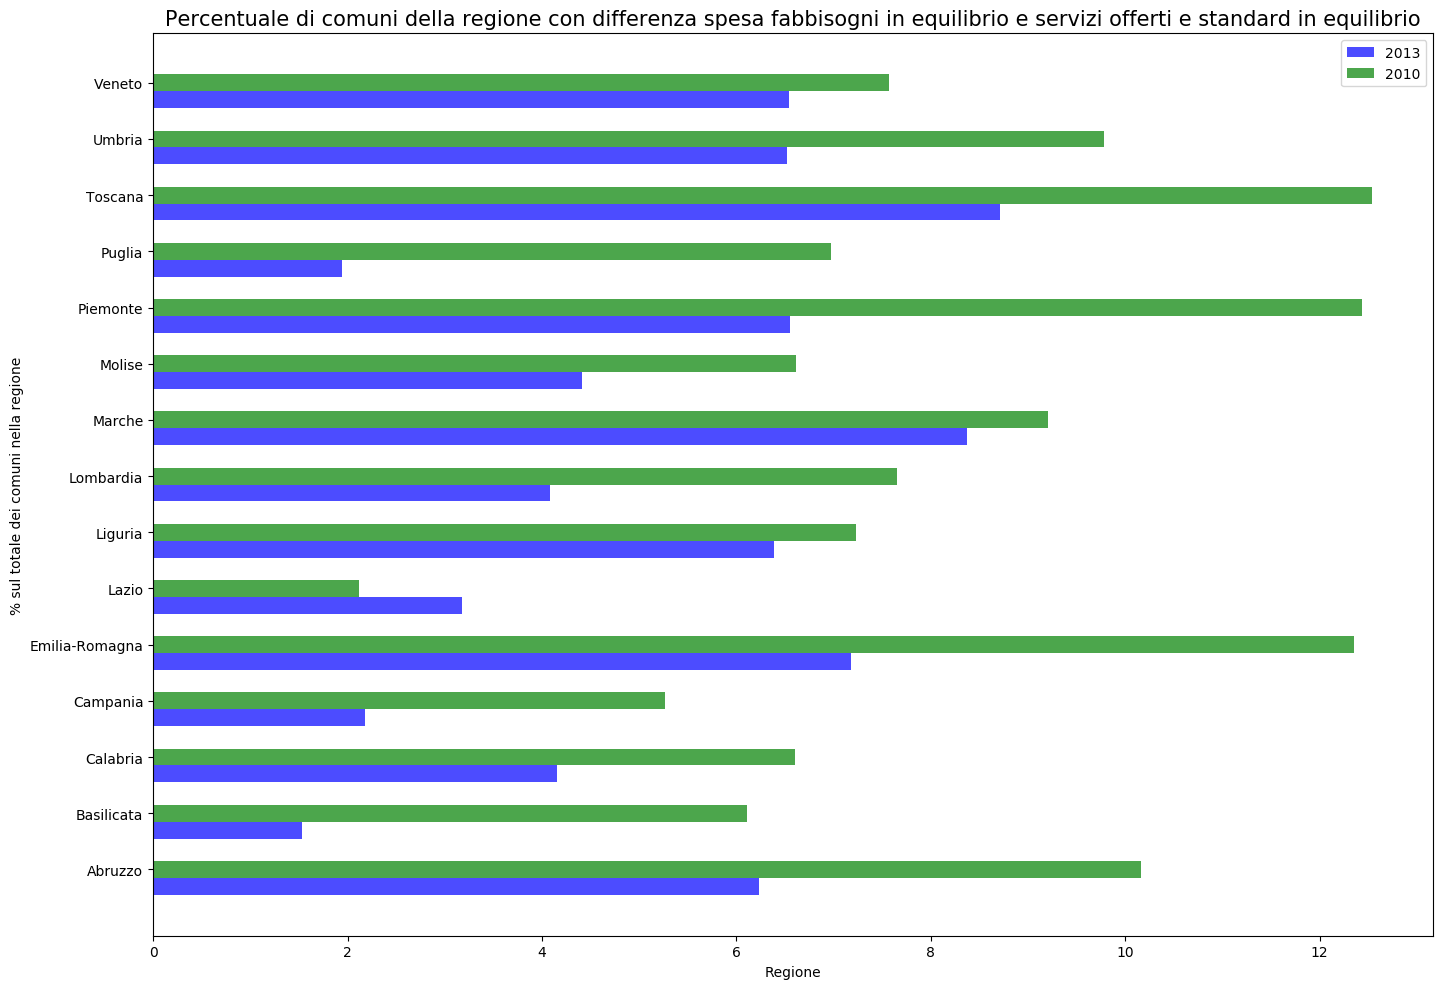

In [40]:
# data to plot
n_groups = 15
means_frank = to_plot#(90, 55, 40, 65)
means_guido = to_plot_pos_10#(85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots(figsize=(15,10))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7
 
rects1 = plt.barh(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='2013')
 
rects2 = plt.barh(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='2010')
 
plt.xlabel('Regione')
plt.ylabel('% sul totale dei comuni nella regione')
plt.title('Percentuale di comuni della regione con differenza spesa fabbisogni in equilibrio e servizi offerti e standard in equilibrio', fontsize =15)
plt.yticks(index + bar_width, list(to_plot_pos_10.index))
plt.legend()
 
plt.tight_layout()
plt.savefig('img/servizio_neg_13.pdf')
plt.show()

### 2.3. Spesa pro-capite: distribuzione sulle fasce <a name="par2.1"></a>

Nel 2013, i paesi la cui spesa supera di molto i fabbisogni registrano la più altra spesa pro-capite, che va a diminuire quando la spesa diventa inderiore al fabbisogno (fasce -1 e -2).

Pertanto, l'andamento resta lo stesso di quello che trovavamo nel 2010. La differenza principale tra 2010 e 2013 è che in generale nel 2013 si riscontra un aumento complessivo della spessa pro-caite. Questo vale per le fasce: 0, 1, 2. 
Per quanto riguarda i comuni il cui fabbisogno è maggiore della spesa, il 50% registra una spesa pro-capite inferiore ai 50 euro.

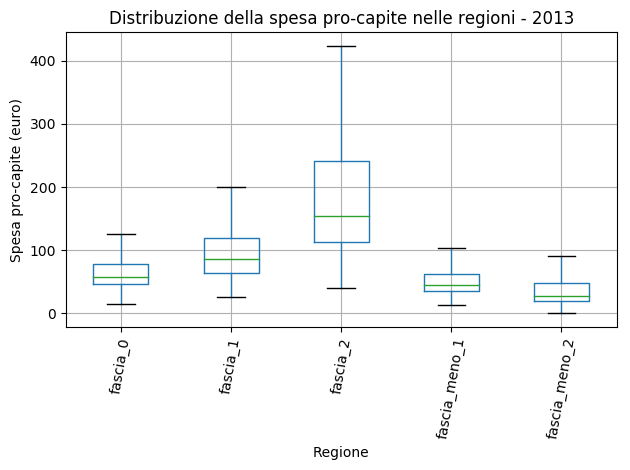

In [41]:
df.boxplot(column=['IND1'], by=['fasce'],showfliers=False )
plt.title('Distribuzione della spesa pro-capite nelle regioni - 2013')
plt.xlabel('Regione')
plt.suptitle('')
plt.ylabel('Spesa pro-capite (euro)')
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig('img/procapite_fasce_2013.pdf')

L'innalzamento della spesa pro-capite media la si osserva anche al livello di regioni. Infatti, nel 2013, la Puglia è l'unica regione la cui spesa è inferiore a 50 euro.

Si evidenzia che il Veneto è l'unica regione del Nord dove il 50% dei comuni ha la spesa pro-capite non superiore a 50 euro.

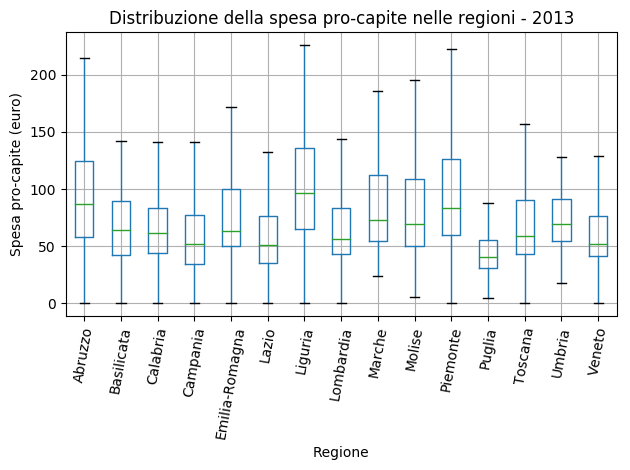

In [42]:
df.boxplot(column=['IND1'], by=['Regione_x'],showfliers=False )
plt.title('Distribuzione della spesa pro-capite nelle regioni - 2013')
plt.xlabel('Regione')
plt.suptitle('')
plt.ylabel('Spesa pro-capite (euro)')
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig('img/procapite_regioni_2013.pdf')

### 2.4. Caratteristiche di reddito dei comuni appartenenti a diverse fasce <a name='par2.4'></a>

Nel 2013 si osserva un aumento complessivo dei redditi medi nei comuni italiani. In particolare, il reddito medio sembra descrescere al ridursi della spesa rispetto al fabbisogno.

Di fatto, ciò che risulta è che nei comuni il cui reddito medio è più basso, la spesa del comune diminuisce. Se la spesa non copre i fabbisogni, ciò che ne risulta potrebbe essere una riduzione dell'offerta dei servizi, il che non è ciò che si aspetta in un comune il cui reddito medio dei cittadini è inferiore a comuni appartenenti a classe dove la spesa per la viabilità è più elevata.

Si sottolinea che questo andamento è lo stesso che si osserva per l'anno 2010.

In [43]:
df['Reddito totale frequenze'] = df['Reddito complessivo da 0 a 10000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 10000 a 15000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 15000 a 26000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 26000 a 55000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 55000 a 75000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 75000 a 120000 euro - Frequenza'].fillna(0) + df['Reddito complessivo minore o uguale a zero euro - Frequenza'].fillna(0) + df['Reddito complessivo oltre 120000 euro - Frequenza'].fillna(0) 
df['Reddito totale ammontare'] = df['Reddito complessivo da 0 a 10000 euro - Ammontare'].fillna(0) + df['Reddito complessivo da 10000 a 15000 euro - Ammontare'].fillna(0) + df['Reddito complessivo da 15000 a 26000 euro - Ammontare'].fillna(0) + df['Reddito complessivo da 26000 a 55000 euro - Ammontare'].fillna(0) + df['Reddito complessivo da 55000 a 75000 euro - Ammontare'].fillna(0) + df['Reddito complessivo da 75000 a 120000 euro - Ammontare'].fillna(0) + df['Reddito complessivo minore o uguale a zero euro - Ammontare'].fillna(0) + df['Reddito complessivo oltre 120000 euro - Ammontare'].fillna(0) 

In [44]:
df['Reddito per abitante'] = df['Reddito totale ammontare']/df['Reddito totale frequenze']

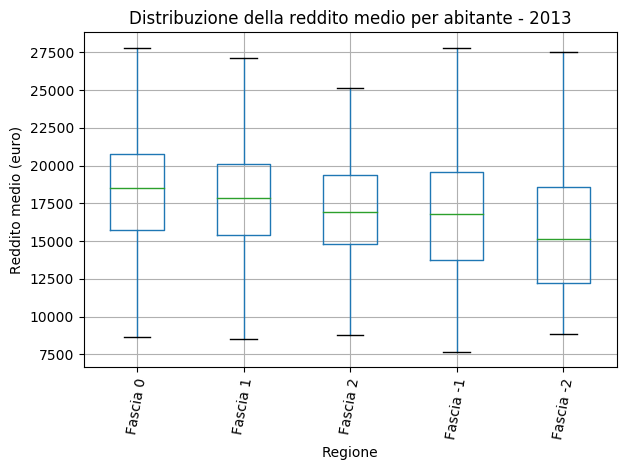

In [45]:
df.boxplot(column=['Reddito per abitante'], by=['fasce'],showfliers=False )
plt.title('Distribuzione della reddito medio per abitante - 2013')
plt.xlabel('Regione')
plt.suptitle('')
plt.ylabel('Reddito medio (euro)')
plt.xticks([1,2,3,4,5],['Fascia 0','Fascia 1','Fascia 2','Fascia -1','Fascia -2'],rotation=80)
plt.tight_layout()
plt.savefig('img/reddito_medio_2013.pdf')

Infine vediamo se nel 2013 è visibile una relazione tra la classe di reddito dei cittadini e la fascia di appartenenza.

Anche nel 2013 non si nota il cambiamento delle proporzioni delle classi di reddito tra i cittadini al variare delle fasce. 

Come fatto in precedenza, può essere interessante osservare che:

* L'Abruzzo registra:
    - un aumento della popolazione con reddito tra 0 e 15'000 quando la spesa si avvicina al fabbisogno, e la riduzione delle classi di reddito più ricche.
    - una riduzione della popolazione con reddito tra 0-15'000 quando la spesa è inferiore del fabbisogno.
    
Si sottolinea in oltre la presenza di due regioni: Molise ed Umbria, che non hanno comuni la cui spesa eccede più di due volte i fabbisogni.

In [46]:
# Redditi e tasse
df['Reddito totale frequenze'] = df['Reddito complessivo da 0 a 10000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 10000 a 15000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 15000 a 26000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 26000 a 55000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 55000 a 75000 euro - Frequenza'].fillna(0) + df['Reddito complessivo da 75000 a 120000 euro - Frequenza'].fillna(0) + df['Reddito complessivo minore o uguale a zero euro - Frequenza'].fillna(0) + df['Reddito complessivo oltre 120000 euro - Frequenza'].fillna(0) 

# Aggiustare i dati per i plot
fasce = ['fascia_0','fascia_1', 'fascia_2', 'fascia_meno_1', 'fascia_meno_2']

dictionary_fasce = {}
for f in fasce: 
    df_fascia_0 = df[df['fasce'] == f]

    # Ottenere totale frequenze redditi nelle varie regioni
    totale_fascia = df_fascia_0[['Reddito totale frequenze', 'Regione_x']].groupby('Regione_x').sum()['Reddito totale frequenze']

    # Ottenere frequenze sulle diverse fasce di reddito nelle diverse regioni
    redditi_regioni = df_fascia_0[['Reddito complessivo da 0 a 10000 euro - Frequenza', 'Reddito complessivo da 10000 a 15000 euro - Frequenza','Reddito complessivo da 15000 a 26000 euro - Frequenza','Reddito complessivo da 26000 a 55000 euro - Frequenza','Reddito complessivo da 55000 a 75000 euro - Frequenza','Reddito complessivo da 75000 a 120000 euro - Frequenza', 'Reddito complessivo minore o uguale a zero euro - Frequenza', 'Reddito complessivo oltre 120000 euro - Frequenza', 'Regione_x']].groupby('Regione_x').sum()#.describe()

    # Matrice di dati da plottare
    to_plot = redditi_regioni.div(totale_fascia, axis=0)*100
    
    dictionary_fasce[f] = to_plot

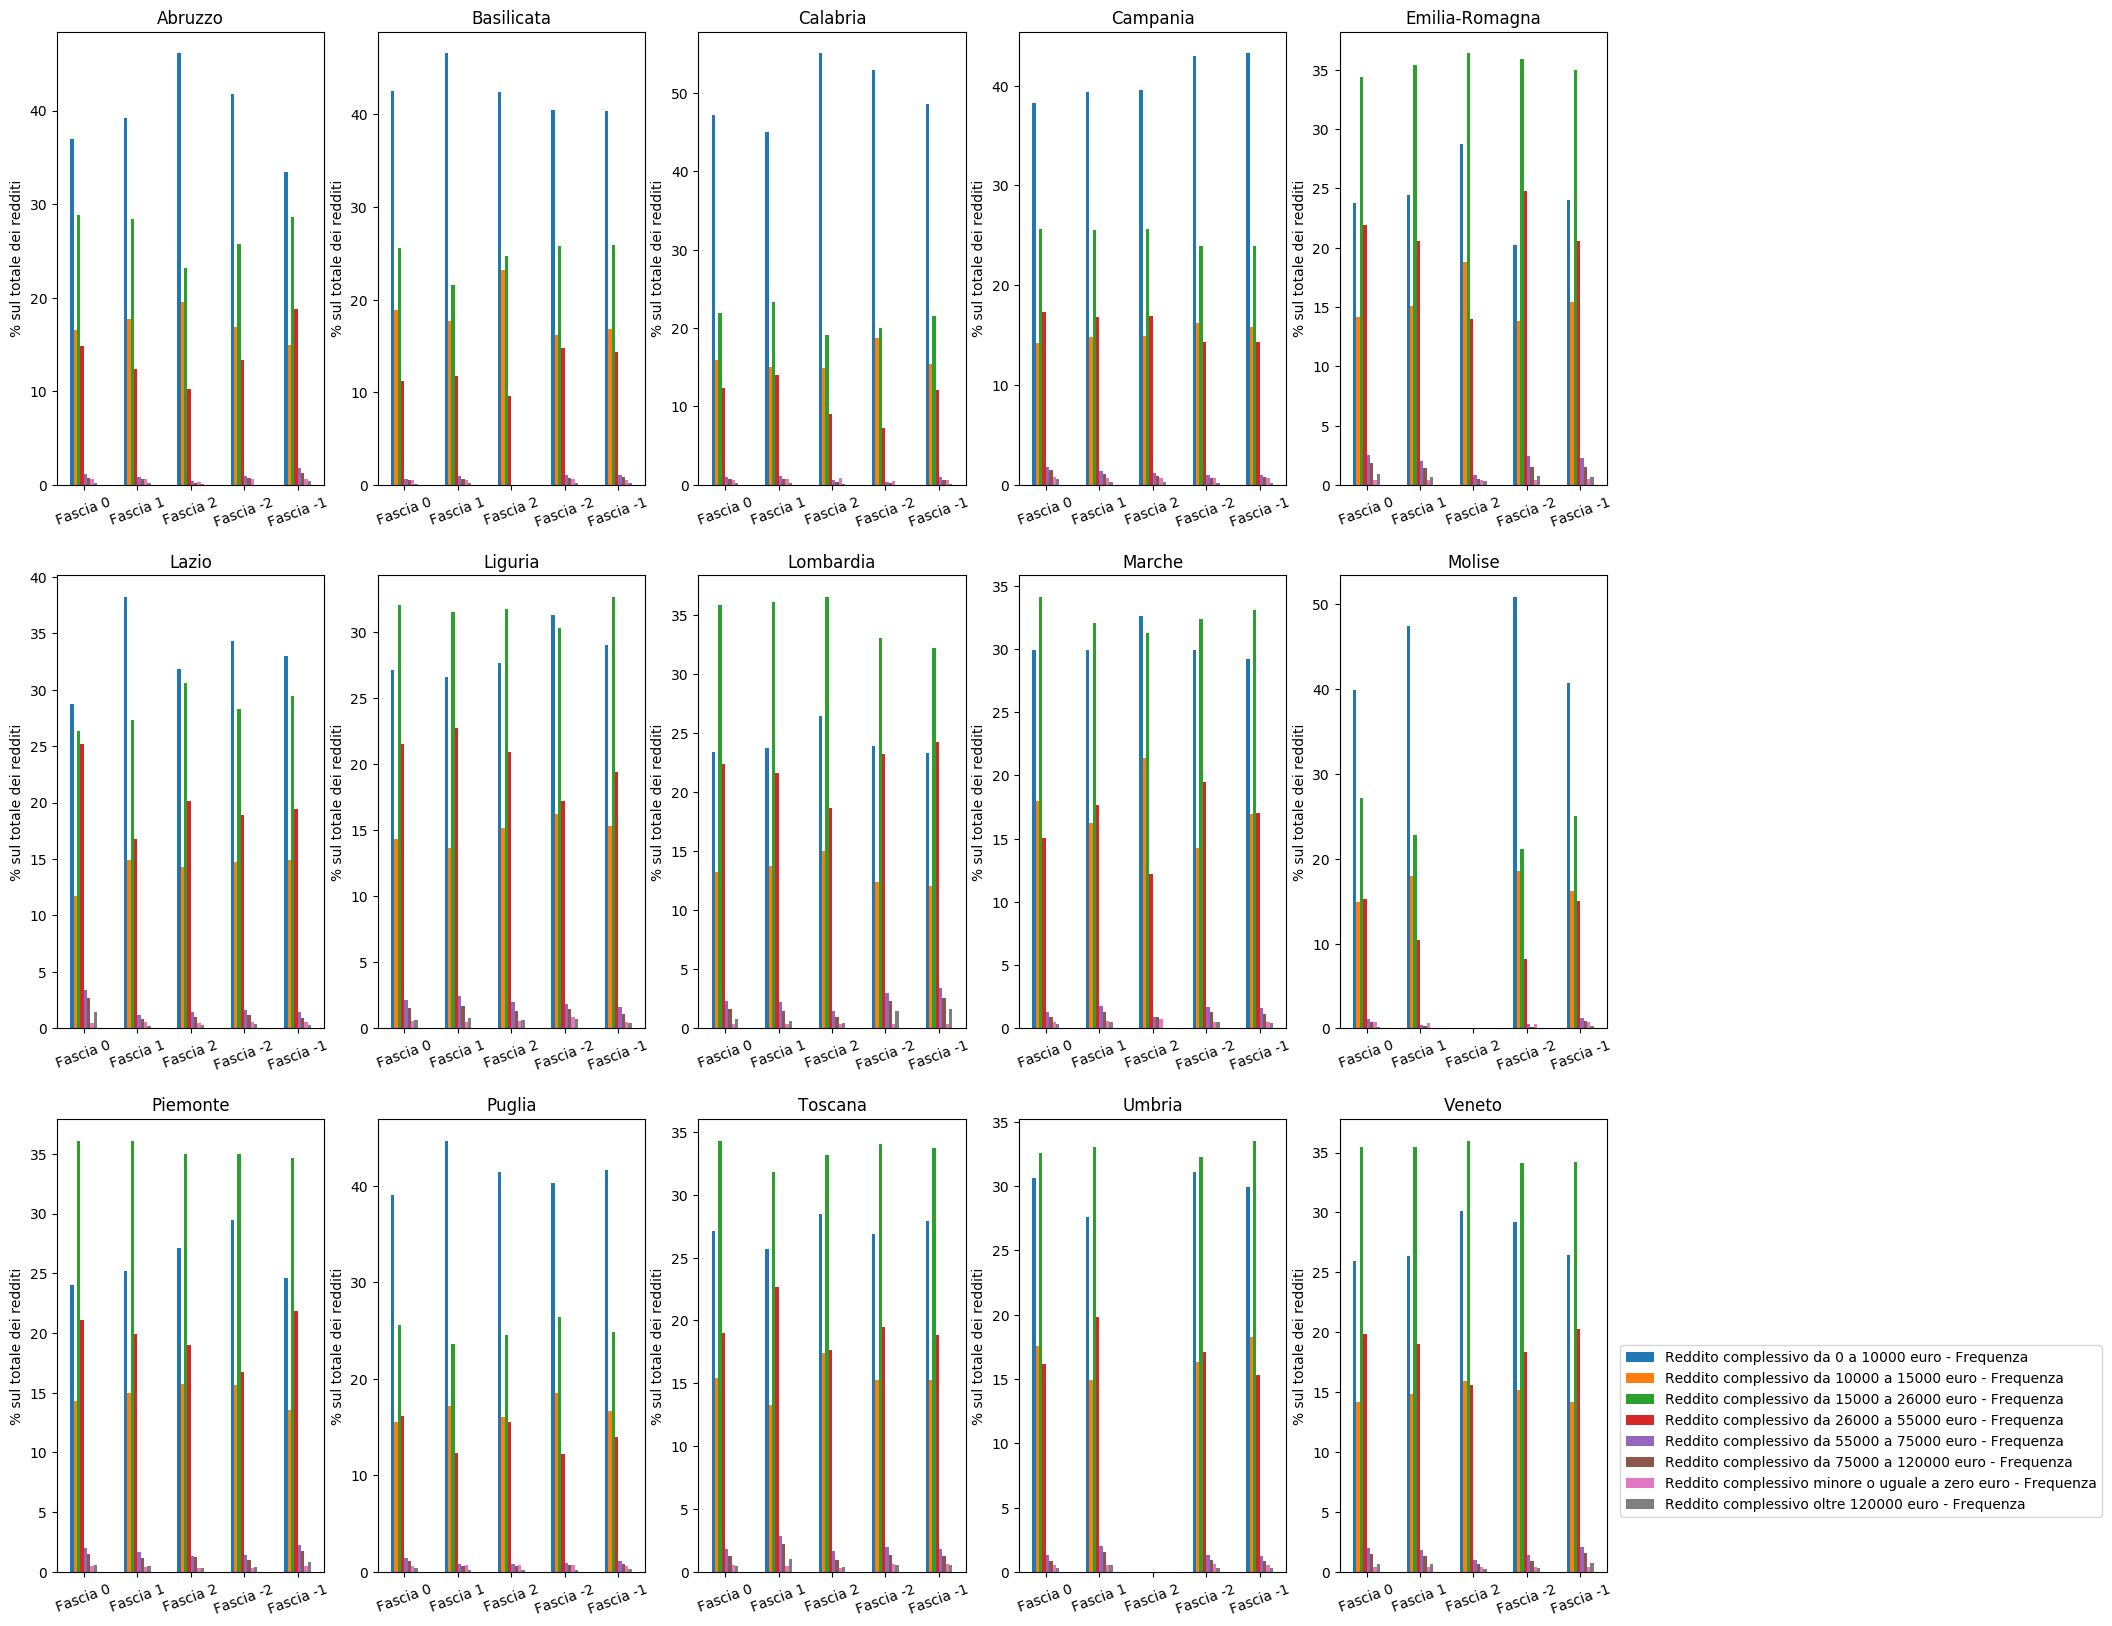

In [47]:
def buckets(i):
    return list(df['LQP_COD_1'].groupby(df['Regione_x']))[i][0]

num_plots = len(df['LQP_COD_1'].groupby(df['Regione_x']).describe())
fig, axes = plt.subplots(3,5,figsize=(20,20))

for i,r in enumerate(regioni):
    try:
        fascia_0 = dictionary_fasce['fascia_0'].loc[r]
    except: fascia_0 = np.array([0]*8)
    
    try:
        fascia_1 = dictionary_fasce['fascia_1'].loc[r]
    except: fascia_1 = np.array([0]*8)
    
    try:
        fascia_2 = dictionary_fasce['fascia_2'].loc[r]
    except:fascia_2 = np.array([0]*8)
        
    try:
        fascia_meno_2 = dictionary_fasce['fascia_meno_2'].loc[r]
    except:fascia_meno_2 = np.array([0]*8)
        
    try:
        fascia_meno_1 = dictionary_fasce['fascia_meno_1'].loc[r]
    except:fascia_meno_1 = np.array([0]*8)
    
    df_to_plot = pd.DataFrame([fascia_0,fascia_1,fascia_2,fascia_meno_2, fascia_meno_1])
    df_to_plot.index = ['Fascia 0', 'Fascia 1', 'Fascia 2', 'Fascia -2', 'Fascia -1']
    
    row = i // 5
    col = i % 5
    ax_curr = axes[row, col]
    
    df_to_plot.plot.bar(legend=False, ax=ax_curr)#.legend(bbox_to_anchor=(1.05, 0), loc='best', borderaxespad=0.)
    #ax_curr.tick_params(axis='x', labelrotation=45)
    
    for tick in ax_curr.get_xticklabels():
        tick.set_rotation(20)
    #sns.distplot(np.array(distribuzione_regione), ax=ax_curr)
    ax_curr.set_title(buckets(i))
    ax_curr.set_ylabel('% sul totale dei redditi')
    
#df_to_plot.plot.bar(legend=False, ax=ax_curr).legend(bbox_to_anchor=(1.05, 0.5), loc='best', borderaxespad=0.)
ax_curr.legend(bbox_to_anchor=(1.05, 0.5), loc='best', borderaxespad=0.)
plt.xticks(rotation = 20)
plt.savefig('img/reddito_fasce_2013.pdf', bbox_inches="tight")